# Techniques

- Hypothesis Testing (1)
- Hypothesis Testing with Randomization
- Confidence Intervals
- Bootstrapping
- Regression Modeling (2)
- Diagnostics of the Model (3)
    - Goodness of Fit
    - Feature Selection
    - Residuals
- t-tests (4)
- F-tests (5)
- Casual Inference
- Bayesian Networks
- ANOVA
- Model Selection (6)
    - AIC
    - BIC
    - MSPE
    - $R^2$
    - $R_a^2$
- Generalized Linear Modeling (7)

# Rubric

What is expected:

- Work and Process Shown in a Jupyter Notebook
- Last Markdown Cell as a Formal Writeup
    - Expectation of 1-2 page paper, 400-500 words

Graded on basis of the quality of:

- Statistical Analysis
- Paper
- Presentation

Points Breakdown

- **10**
    - Clear Layout of Work
    - Inclusion of the 1-2 page writeup
    - Formatting with Brief Description of What Each Cell is Doing (commenting)
        - Markdown Cell above each Coding Cell
        - Commnenting within Each Cell
- **25** (Writeup - Each of the Following will Receive a Grade of 0-5)
    - Context and Purpose of Writing
    - Content Development
    - Sources and Evidence
    - Explanation of Statistical Analyses
    - Syntax and Mechanics
- **65**
    - (0-10): Definition of Problem/Question of Interest
    - (0-10): Proposal of Solution(s) to Answer the Question
    - (0-25): Implementing Solution(s) to Answer the Question
    - Each of the 5 *Techniques* Above will be Broken Into 0-5 Subscores
    - (0-20): Evaluation of Outcomes, Interpretation of Results, etc.

# Outline of Writeup

- Introduction/Background
    - Why are you interested in this problem?
    - What is the relevant background information for readers to understand your project? (assume readers are not experts in this application field)
    - Is there any prior research on this topic that might be helpful for the audience
    - From where did the data come? Is this an experiment or observational study? Who collected the data? Why was the data collected?
    - What are the questions of interest that we hope to answer?
- Methods/Results (experimental design and data collection)
    - How did you obtain this data?
    - Describe the exploratory data analysis methods. What needed to be done to the dataset to make it amenable to analysis?
    - What analyses are most appropriate to answer the questions of interest?
    - Describe the analyses used. Check assumptions!
    - Present relevant graphics and interpret results.
    - Explicitly connect your technical (i.e. statistical, mathematical) resutls to the research questions.
- Conclusion
    - What are the conclusions? What was learned?
    - How could we extend this research? What future research ideas comes to mind based on the results and experience with this analysis?

In [174]:
# import libraries
library(tidyverse)
library(caret)
library(corrplot)
library(reshape2)
library(gridExtra)
library(leaps)
library('ggpubr')

In [175]:
# changing jupyter.plot_scale
# options(jupyter.plot_scale=1)
# options(jupyter.plot_scale=2)

In [176]:
# read in dataset
# from https://www.kaggle.com/datasets/wduckett/moneyball-mlb-stats-19622012
df <- read_csv('data/baseball.csv')

Rows: 1232 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Team, League
dbl (13): Year, RS, RA, W, OBP, SLG, BA, Playoffs, RankSeason, RankPlayoffs,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [177]:
head(df)

Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NA,NA,162,0.317,0.415
ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4,5,162,0.306,0.378
BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5,4,162,0.315,0.403
BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NA,NA,162,0.331,0.428
CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NA,NA,162,0.335,0.424
CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NA,NA,162,0.319,0.405


What does each column mean?

- Team
- League
- Year
- Runs Scored (RS)
- Runs Allowed (RA)
- Wins (W)
- On-Base Percentage (OBP)
- Slugging Percentage (SLG): total bases divided by at-bats
    - total bases: sum of the number of singles (1), doubles (2), triples (3), and home runs (4)
- Batting Average (BA)
- Playoffs (binary)
- RankSeason
- RankPlayoffs
- Games Played (G)
- Opponent On-Base Percentage (OOBP)
- Opponent Slugging Percentage (OSLG)

In [178]:
summary(df)

     Team              League               Year            RS        
 Length:1232        Length:1232        Min.   :1962   Min.   : 463.0  
 Class :character   Class :character   1st Qu.:1977   1st Qu.: 652.0  
 Mode  :character   Mode  :character   Median :1989   Median : 711.0  
                                       Mean   :1989   Mean   : 715.1  
                                       3rd Qu.:2002   3rd Qu.: 775.0  
                                       Max.   :2012   Max.   :1009.0  
                                                                      
       RA               W              OBP              SLG        
 Min.   : 472.0   Min.   : 40.0   Min.   :0.2770   Min.   :0.3010  
 1st Qu.: 649.8   1st Qu.: 73.0   1st Qu.:0.3170   1st Qu.:0.3750  
 Median : 709.0   Median : 81.0   Median :0.3260   Median :0.3960  
 Mean   : 715.1   Mean   : 80.9   Mean   :0.3263   Mean   :0.3973  
 3rd Qu.: 774.2   3rd Qu.: 89.0   3rd Qu.:0.3370   3rd Qu.:0.4210  
 Max.   :1103.0   Max.  

In [179]:
dim(df)

[1] 1232   15

In [180]:
col_na <- data.frame(Nulls = sapply(df, function(x) sum(length(which(is.na(x))))))
col_na

,Nulls
,<int>
Team,0
League,0
Year,0
RS,0
RA,0
W,0
OBP,0
SLG,0
BA,0


It seems that `RankSeason` and `RankPlayoffs` are associated and explainable NAs. If a team did not make the playoffs, they weren't ranked during the season, and subsequently didn't receive a rank for the playoffs.

We have two ways to proceed:

- drop the rows
- mark a non-ranked year for both seasons and playoffs as 0

In this case, removing the rows removes potentially valuable information as to why a team wasn't ranked. Although there will be multiple teams with rankings of 0, while the rest receive unique rankings, this data tells us something. We don't get a complete picture if we only have data on the winners.

Therefore, we will be replacing the NAs in `RankSeason` and `RankPlayoffs` with 0s.

Let's explore Opponent On-Base Percentage (`OOBP`) and Opponent Slugging Percentage (`OSLG`) more, which also seem associated.

In [181]:
col_na <- count(df[which(is.na(df['OOBP'])),], Year)
col_na

Year,n
<dbl>,<int>
1962,20
1963,20
1964,20
1965,20
1966,20
1967,20
1968,20
1969,24
1970,24


In [182]:
summary(col_na)
season_break <- max(col_na)

      Year            n        
 Min.   :1962   Min.   :20.00  
 1st Qu.:1970   1st Qu.:24.00  
 Median :1979   Median :26.00  
 Mean   :1979   Mean   :24.61  
 3rd Qu.:1988   3rd Qu.:26.00  
 Max.   :1998   Max.   :30.00  

It looks like those specific metrics, Opponent On-Base Percentage (`OOBP`) and Opponent Slugging Percentage (`OSLG`), just weren't captured before the 1999 season.

So, this gives us two ways to proceed:

- drop the rows and use 1999-2012 seasons
- drop the columns and use all seasons

Baseball tactics and training has changed through the years, the game has literally changed from 1962 to 2012. So, while we may have more observations to train models on using all seasons, we may obtain a more accurate model by focusing on the current years. But, this is something we can investigate.

This gives us some potential research questions.

1. Are more closely related seasons (in time) better indicators of each other?
2. Which features are pertinent for a model? Do we even need OOBP and OSLG?

There are some slight issues preventing us from using other features or predicting certain events.

1. We may not even be able to use season or playoff rankings as those are dependent on the year and how the other teams do as well.
2. We don't have data from points throughout the season, so we don't have the capability to predict where a team might finish given their status during the season.
3. Not immediately due to volatiltiy of the players or coaches from one season to the next, but to historical changes within franchises (creation, dissolution, name changes, city changes, etc.), it can be difficult to track a team from one season to the next.

Playoffs and winning the series are great achievements, but often a team's achievements are also frequently measured in:

- Run Differential (most telling): subtracting the number of runs allowed from a number of runs scored (1)
    - positve: a strong team which outscores its opponents
    - negative: a team that is struggling to keep up with it's opponents
- Winning Percentage: calculated using the Pythagorean expectation, which estimates a team's winning percentage based on runs scored and runs allowed (1)
- On-Base Percentage: how frequently a batter reaches base per plate appearence (2)
- Slugging Percentage: total number of bases a team accumulates per at-bat (2)

1: https://www.samford.edu/sports-analytics/fans/2022/MLB-Winning-Percentage-Breakdown-Which-Statistics-Help-Teams-Win-More-Games

2: https://sarahesult.medium.com/common-mlb-statistics-which-stats-determine-a-teams-win-percentage-a6e0a83aa07c

3: https://www.baseball-reference.com/bullpen/Pythagorean_Theorem_of_Baseball

**The Pythagorean Theorem of Baseball** (3)

Let

$R_s$: Runs Scored

$R_a$: Runs Allowed

$W_p$: Winning Percentage

Then, there were two formulas presented:

The more *common*:

$W_p = \frac{R_s^2}{R_s^2 + R_a^2}$

The more *accurate*:

$W_p = \frac{R_s^{1.81}}{R_s^{1.81} + R_a^{1.81}}$


In [183]:
head(df)

Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NA,NA,162,0.317,0.415
ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4,5,162,0.306,0.378
BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5,4,162,0.315,0.403
BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NA,NA,162,0.331,0.428
CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NA,NA,162,0.335,0.424
CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NA,NA,162,0.319,0.405


In [184]:
decade_starts <- seq(from = min(df$Year), to = max(df$Year), 10)
decade_starts

[1] 1962 1972 1982 1992 2002 2012

# Goals

With everything presented, our overarching goals will be:

1. Create a model to predict whether or not a team made the playoffs.
2. Create a model to predict whether or not a team won the series.
3. Create a model to predict other variables previously as features, seen as important metrics:
    - Winning Percentage
    - On-Base Percentage
    - Slugging Percentage
4. Create a model which predicts the best exponents in the Pythagorean Theorem of Baseball.

# Preparation

## Phase 1: Data Cleaning

1. `RankSeason`: drop column
2. `Team`: drop column
3. `RankPlayoffs`: turn into a boolean column for if a team won or not (1 for won, 0 for lost)
4. `G` and `W`: turn into win percentage (decimal format) `WP` $\rightarrow WP = \frac{W}{G}$
5. `G`: drop column
6. `W`: drop column
7. `RS` and `RA`: turn into run differential (integer format) `RD` $\rightarrow RD = RS - RA$
8. `RS`: drop column
9. `RA`: drop column
10. `League`: encode

## Phase 2: Illustrations

*by dates?*

1. Histogram
2. More Plots
3. Playoff makers, series winners, losers, all

## Phase 3: Full Sets

1. Drop `OOBP` and `OSLG` and create models from full set
2. Retain `OOBP` and `OSLG` and create models from seasons with these datapoints

## Phase 4: Decade Sets

1. Drop `OOBP` and `OSLG` and create models from full set (there are only 12 seasons which feature those variables)


In [185]:
head(df)

Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NA,NA,162,0.317,0.415
ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4,5,162,0.306,0.378
BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5,4,162,0.315,0.403
BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NA,NA,162,0.331,0.428
CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NA,NA,162,0.335,0.424
CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NA,NA,162,0.319,0.405


In [186]:
# create new dataframe to perform cleaning on
df_cleaned <- df

In [187]:
# create champion column
df_cleaned$Champion <- df_cleaned$RankSeason %>% replace_na(0)
df_cleaned$Champion[df_cleaned$Champion > 1] <- 0

In [188]:
# create win percentage column
df_cleaned$WP <- with(df_cleaned, W/G)
# create run differential column
df_cleaned$RD <- with(df_cleaned, RS - RA)
# encode League column
df_cleaned$League <- as.factor(df_cleaned$League)

In [189]:
# drop columns
df_cleaned <- df_cleaned %>% select(-c(Team, RS, RA, W, RankSeason, RankPlayoffs, G))

In [190]:
head(df_cleaned)

League,Year,OBP,SLG,BA,Playoffs,OOBP,OSLG,Champion,WP,RD
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NL,2012,0.328,0.418,0.259,0,0.317,0.415,0,0.5000000,46
NL,2012,0.320,0.389,0.247,1,0.306,0.378,0,0.5802469,100
AL,2012,0.311,0.417,0.247,1,0.315,0.403,0,0.5740741,7
AL,2012,0.315,0.415,0.260,0,0.331,0.428,0,0.4259259,-72
NL,2012,0.302,0.378,0.240,0,0.335,0.424,0,0.3765432,-146
AL,2012,0.318,0.422,0.255,0,0.319,0.405,0,0.5246914,72


In [191]:
# rearrange columns
df_cleaned <- df_cleaned %>%
    relocate(Year, League, OBP, SLG, BA, WP, RD, OOBP, OSLG, Playoffs, Champion)

In [192]:
head(df_cleaned)

Year,League,OBP,SLG,BA,WP,RD,OOBP,OSLG,Playoffs,Champion
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,NL,0.328,0.418,0.259,0.5000000,46,0.317,0.415,0,0
2012,NL,0.320,0.389,0.247,0.5802469,100,0.306,0.378,1,0
2012,AL,0.311,0.417,0.247,0.5740741,7,0.315,0.403,1,0
2012,AL,0.315,0.415,0.260,0.4259259,-72,0.331,0.428,0,0
2012,NL,0.302,0.378,0.240,0.3765432,-146,0.335,0.424,0,0
2012,AL,0.318,0.422,0.255,0.5246914,72,0.319,0.405,0,0


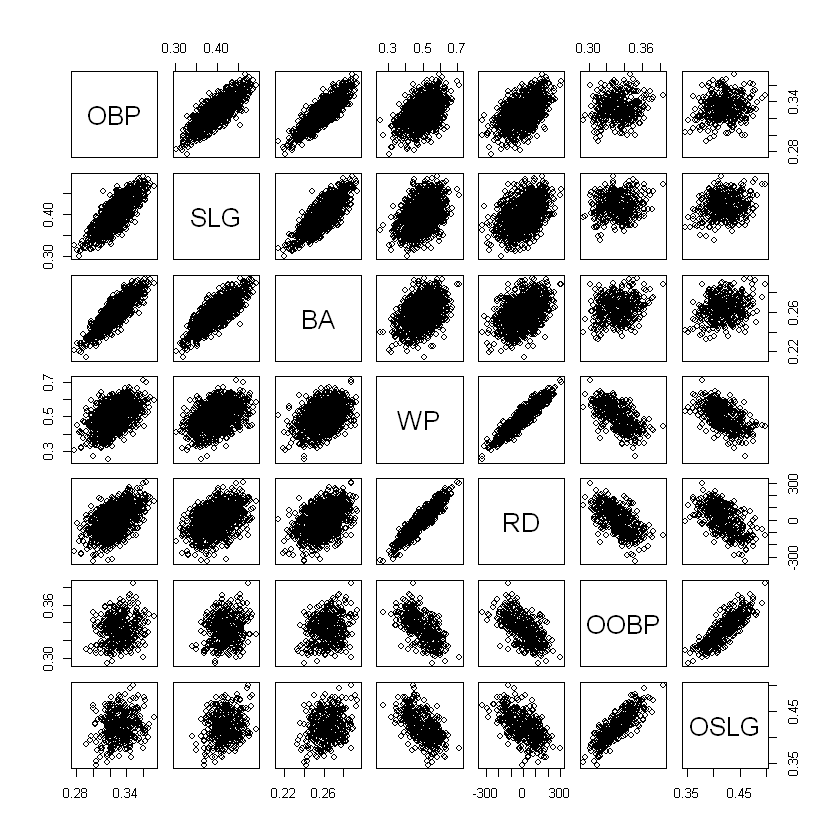

In [193]:
# pairs plot of numerical data
pairs_plots <- df_cleaned %>% select(OBP, SLG, BA, WP, RD, OOBP, OSLG)
pairs(pairs_plots)

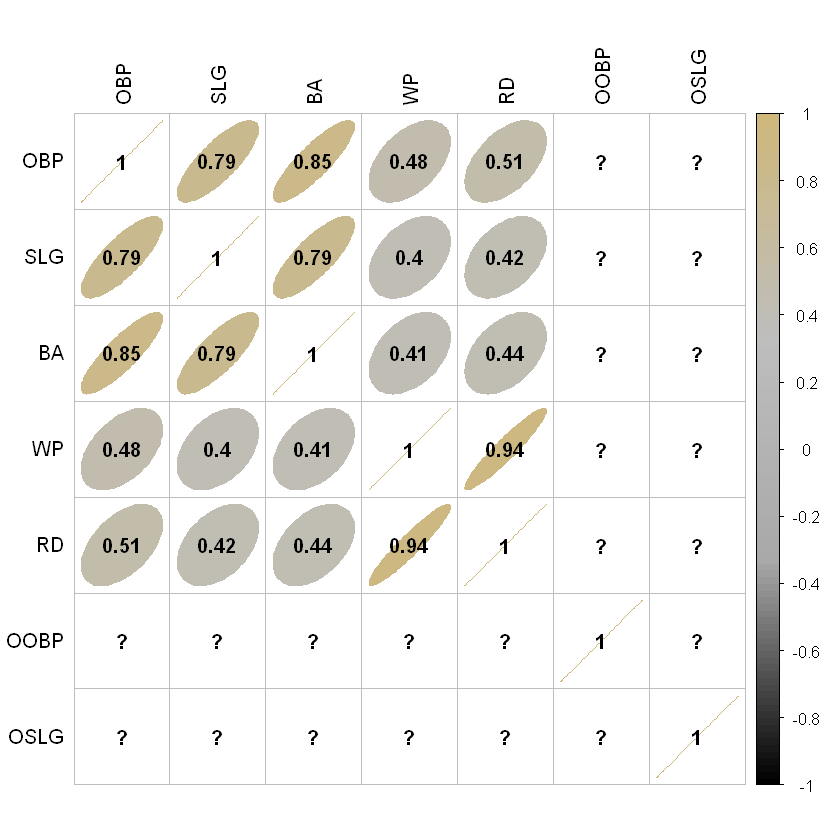

In [194]:
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(pairs_plots), method = "ellipse", 
         col = col4(100),  addCoef.col = "black", tl.col = "black")

In [195]:
numeric_cors <- cor(pairs_plots)
numeric_cors

,OBP,SLG,BA,WP,RD,OOBP,OSLG
OBP,1.0000000,0.7909100,0.8519580,0.4825834,0.5063794,NA,NA
SLG,0.7909100,1.0000000,0.7904806,0.4015411,0.4228647,NA,NA
BA,0.8519580,0.7904806,1.0000000,0.4091678,0.4369427,NA,NA
WP,0.4825834,0.4015411,0.4091678,1.0000000,0.9377861,NA,NA
RD,0.5063794,0.4228647,0.4369427,0.9377861,1.0000000,NA,NA
OOBP,NA,NA,NA,NA,NA,1,NA
OSLG,NA,NA,NA,NA,NA,NA,1


In [196]:
diag(numeric_cors) <- NA
melted_cors <- melt(numeric_cors, na.rm=TRUE)
ordered_cors <- melted_cors[order(-abs(melted_cors$value)), ]
rownames(ordered_cors) <- 1:nrow(ordered_cors)
ordered_cors_unique <- ordered_cors[-seq(2, nrow(ordered_cors), by = 2), ]
ordered_cors_unique

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,RD,WP,0.9377861
3,BA,OBP,0.8519580
5,SLG,OBP,0.7909100
7,BA,SLG,0.7904806
9,RD,OBP,0.5063794
11,WP,OBP,0.4825834
13,RD,BA,0.4369427
15,RD,SLG,0.4228647
17,WP,BA,0.4091678


In [197]:
# RD - WP
# BA - OBP
# SLG - OBP
# BA - SLG

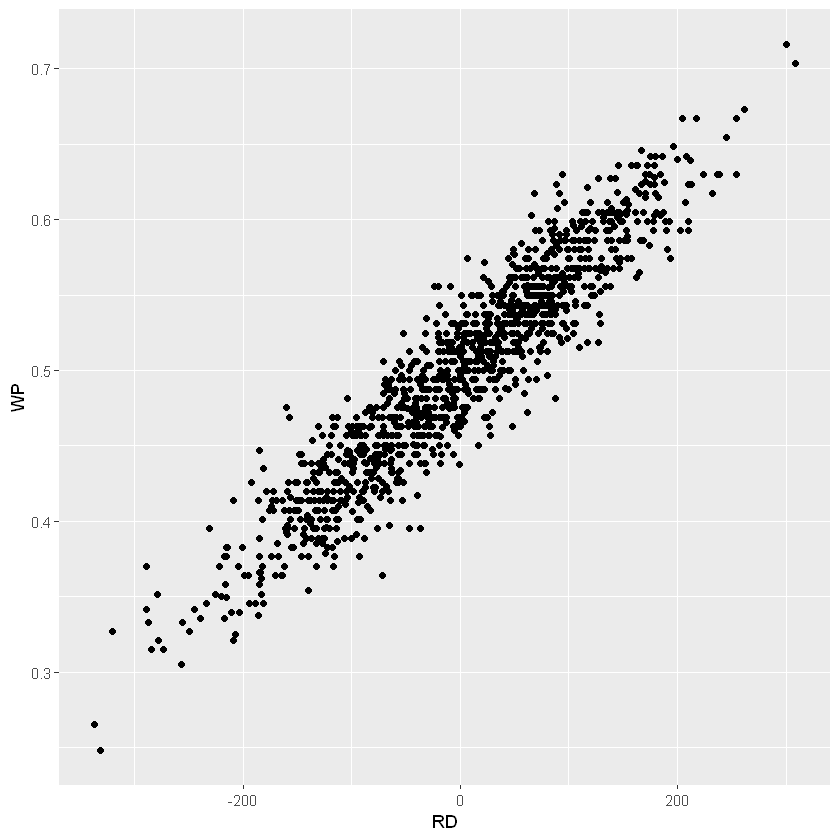

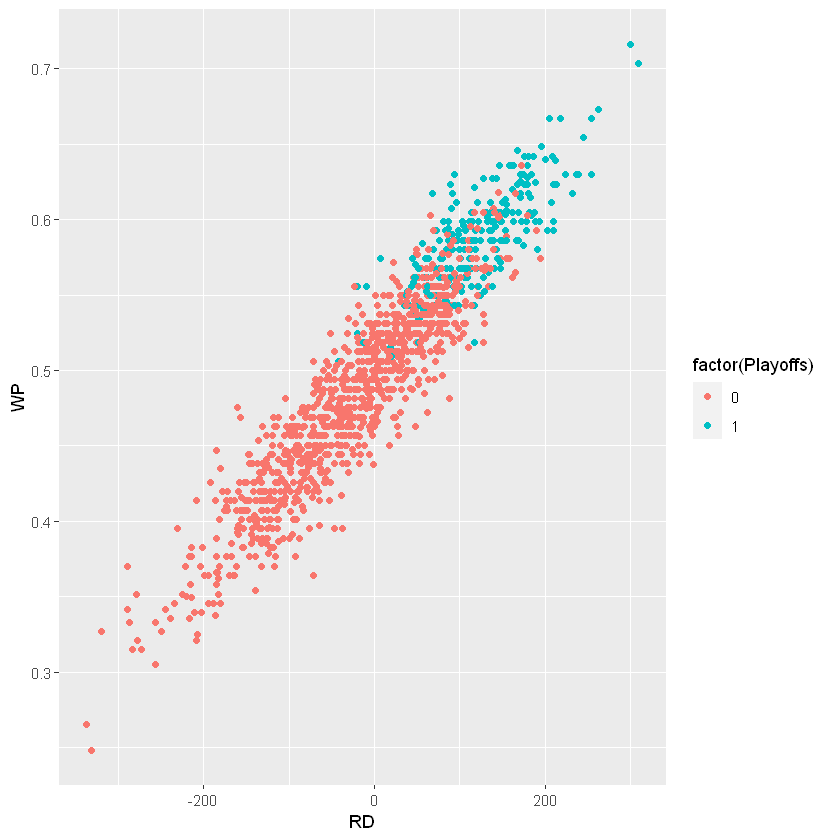

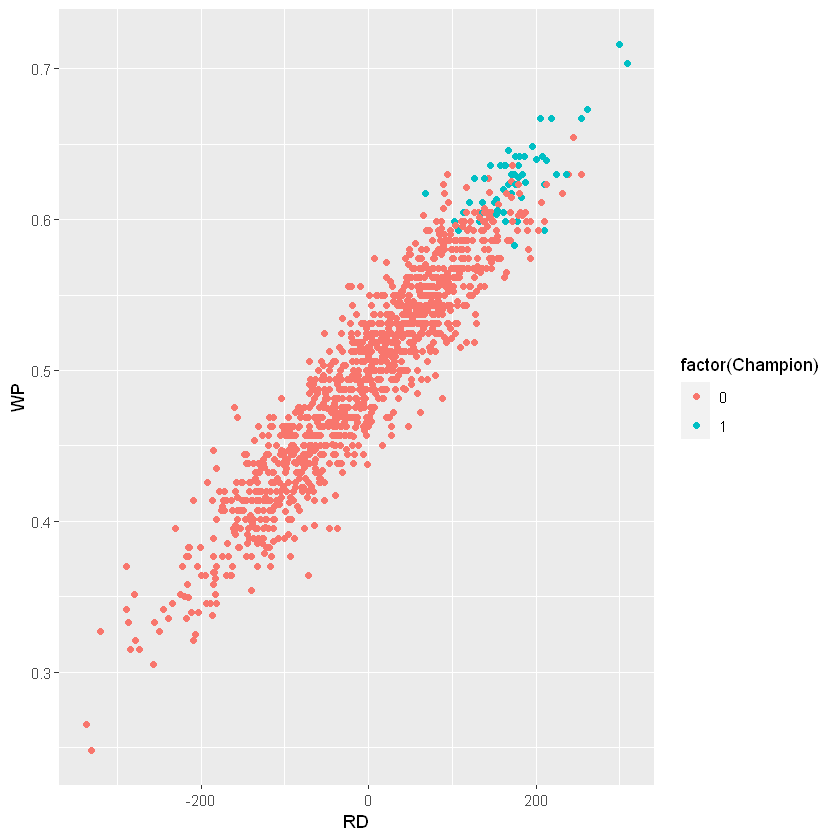

In [198]:
# RD - WP (Run Differential by Win Percentage)
# total
ggplot(data=df_cleaned) +
    geom_point(aes(x=RD, y=WP))
# by playoffs
ggplot(data=df_cleaned) +
    geom_point(aes(x=RD, y=WP, color=factor(Playoffs)))
# by championships
ggplot(data=df_cleaned) +
    geom_point(aes(x=RD, y=WP, color=factor(Champion)))

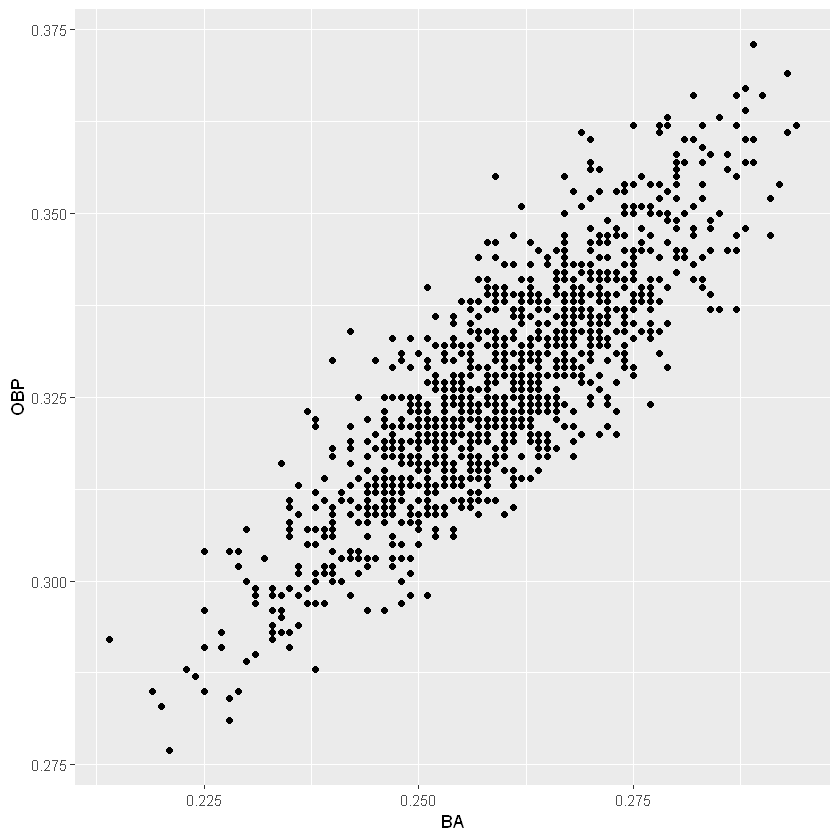

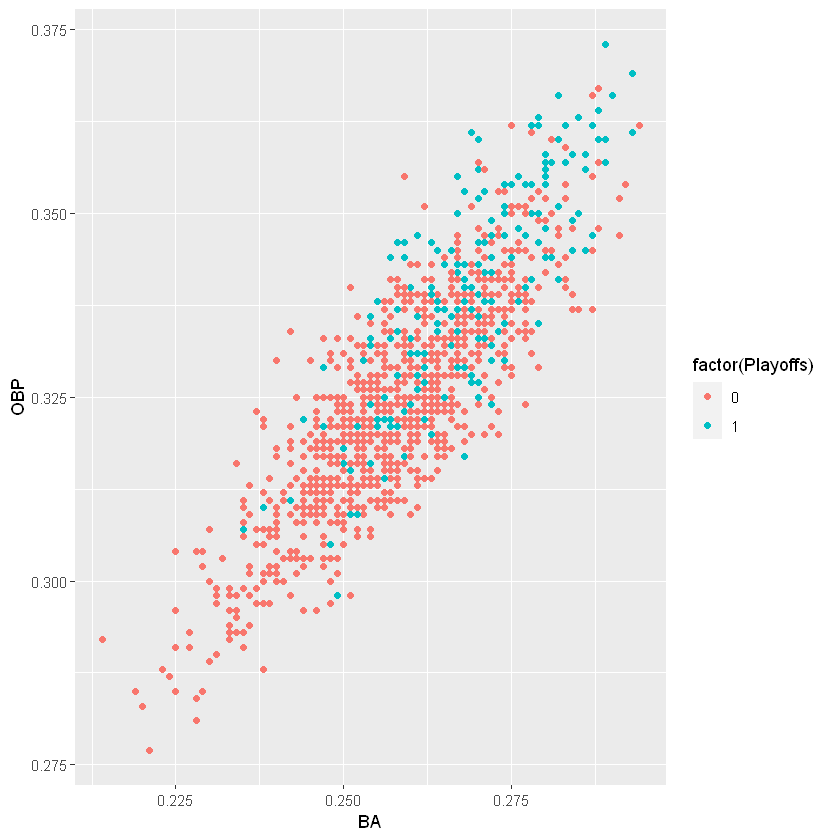

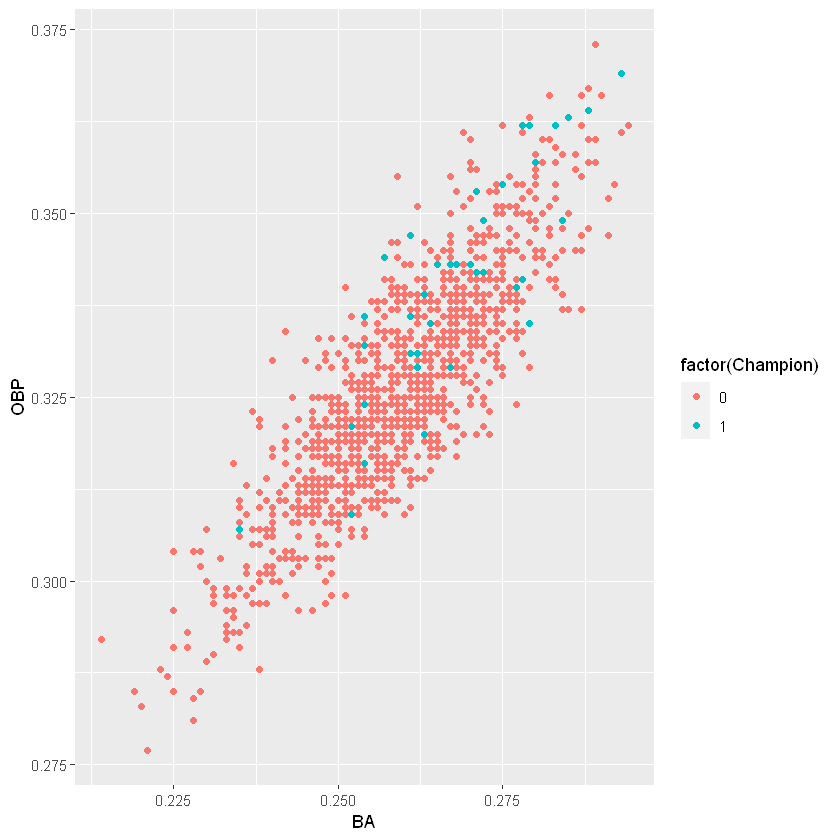

In [199]:
# BA - OBP (Batting Average by On Base Percentage)
# total
ggplot(data=df_cleaned) +
    geom_point(aes(x=BA, y=OBP))
# by playoffs
ggplot(data=df_cleaned) +
    geom_point(aes(x=BA, y=OBP, color=factor(Playoffs)))
# by championships
ggplot(data=df_cleaned) +
    geom_point(aes(x=BA, y=OBP, color=factor(Champion)))

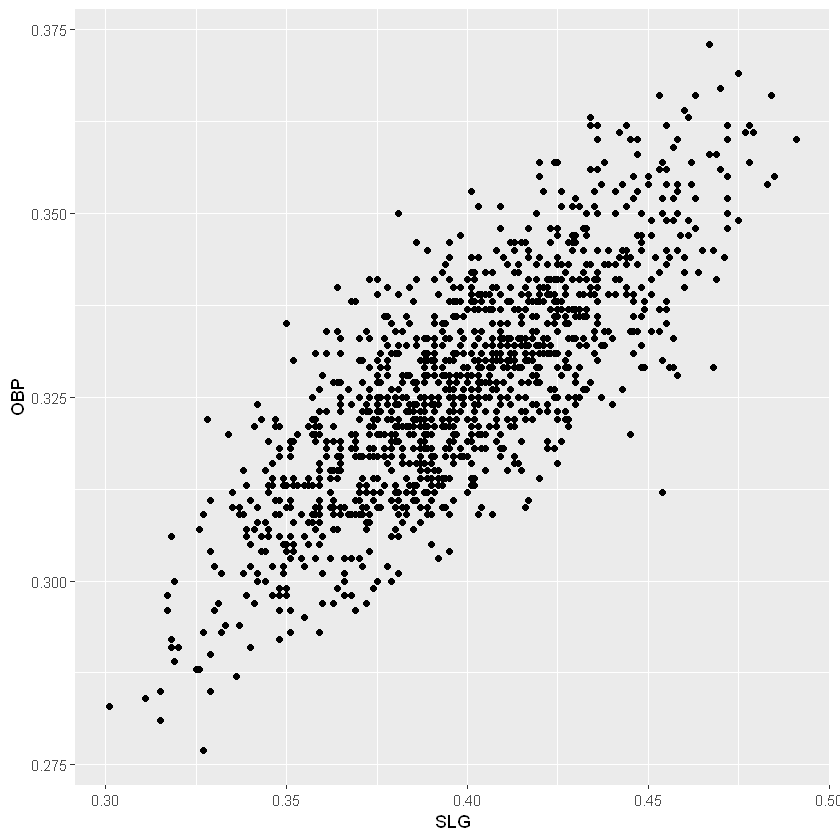

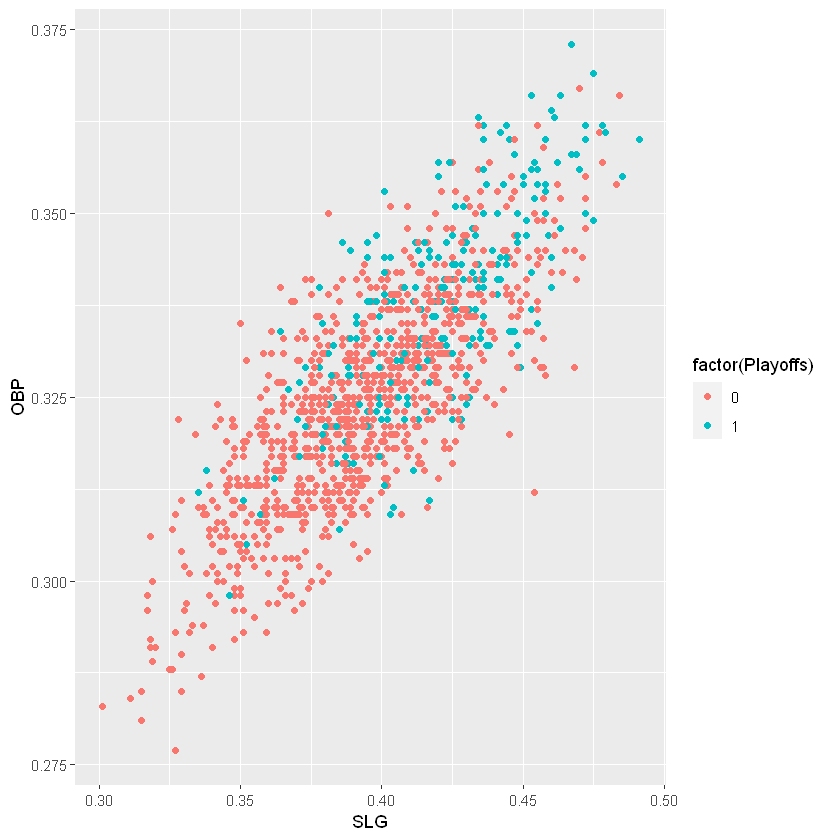

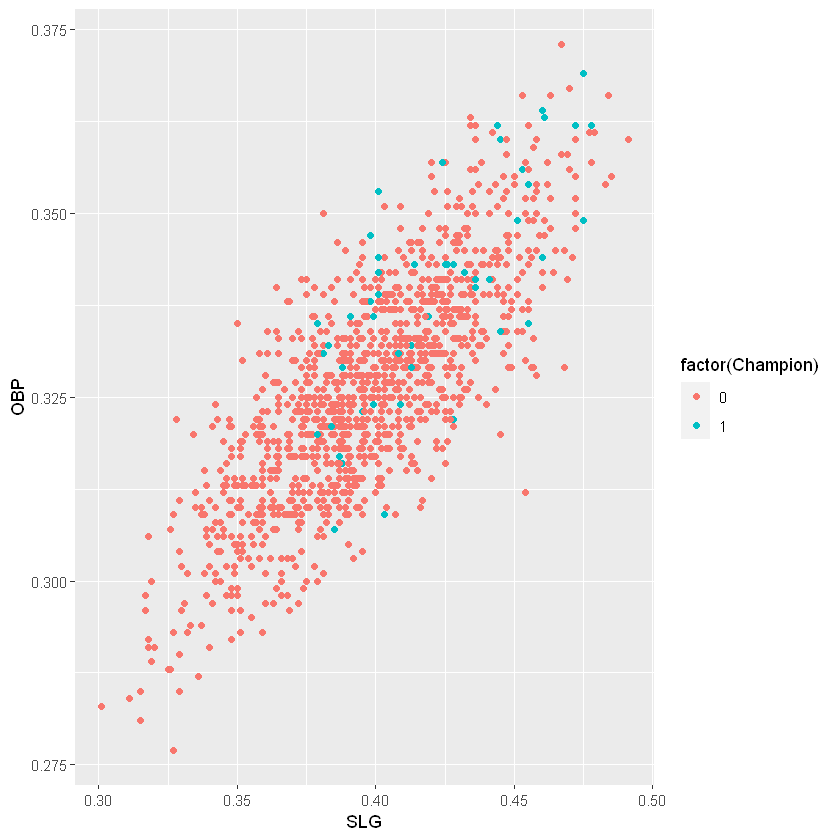

In [200]:
# SLG - OBP (Slugging Percentage by On Base Percentage)
# total
ggplot(data=df_cleaned) +
    geom_point(aes(x=SLG, y=OBP))
# by playoffs
ggplot(data=df_cleaned) +
    geom_point(aes(x=SLG, y=OBP, color=factor(Playoffs)))
# by championships
ggplot(data=df_cleaned) +
    geom_point(aes(x=SLG, y=OBP, color=factor(Champion)))

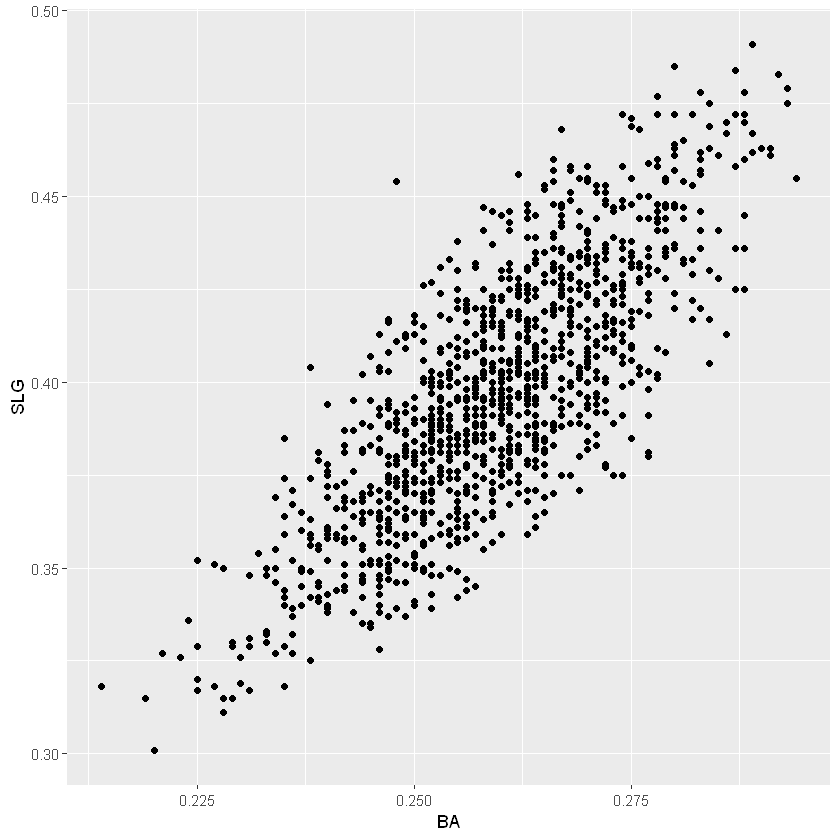

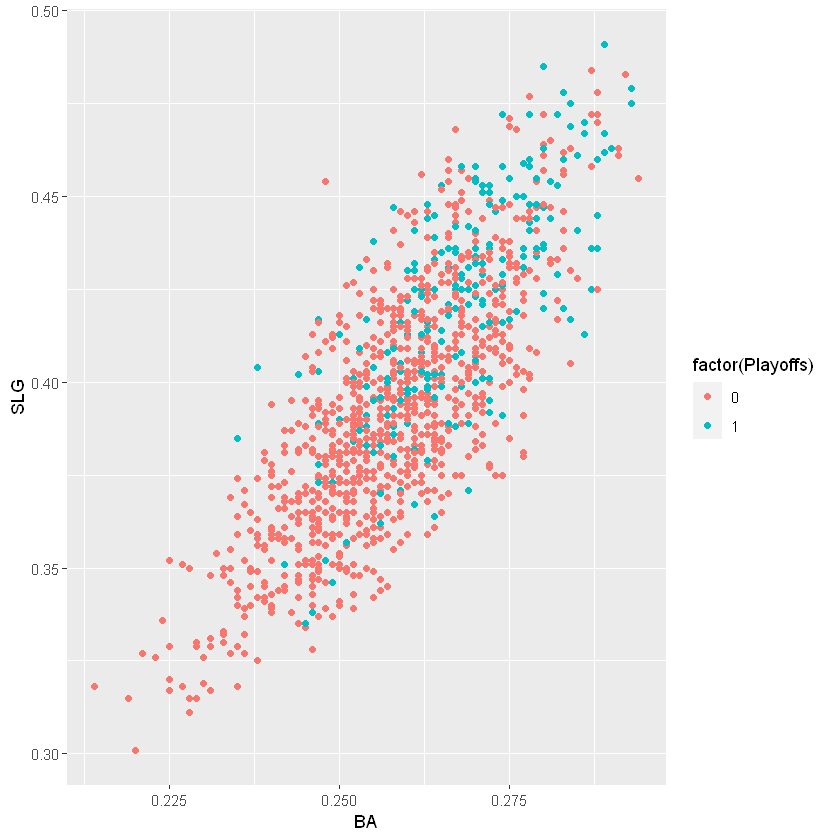

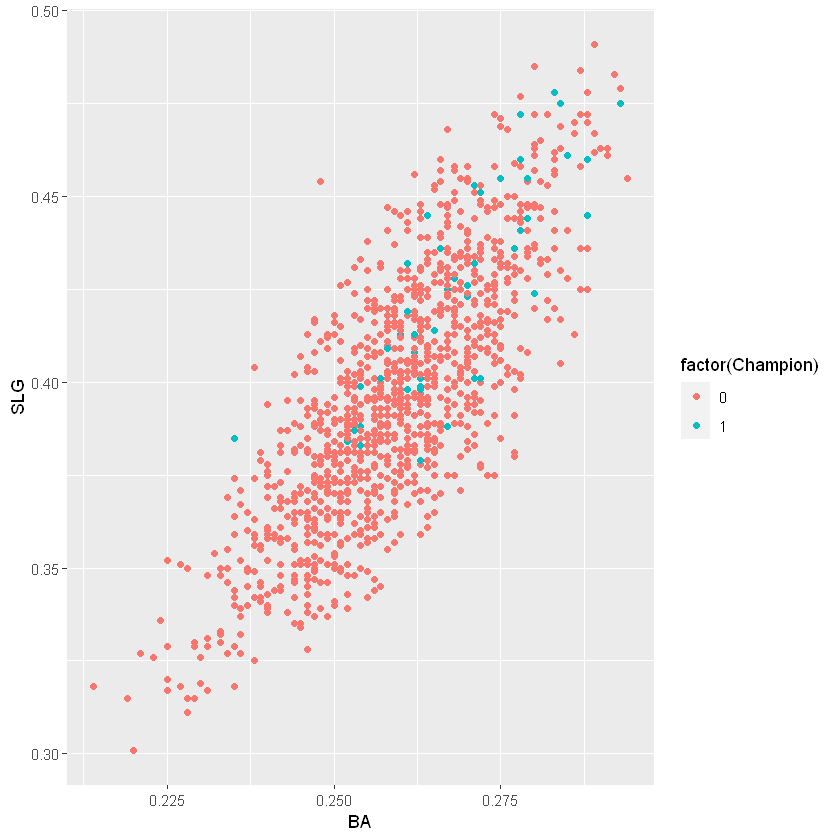

In [201]:
# BA - SLG (Batting Average vs Slugging Percentage)
# total
ggplot(data=df_cleaned) +
    geom_point(aes(x=BA, y=SLG))
# by playoffs
ggplot(data=df_cleaned) +
    geom_point(aes(x=BA, y=SLG, color=factor(Playoffs)))
# by championships
ggplot(data=df_cleaned) +
    geom_point(aes(x=BA, y=SLG, color=factor(Champion)))

In [202]:
# look at OBP, SLG, BA, WP, RD against Playoffs and Champion

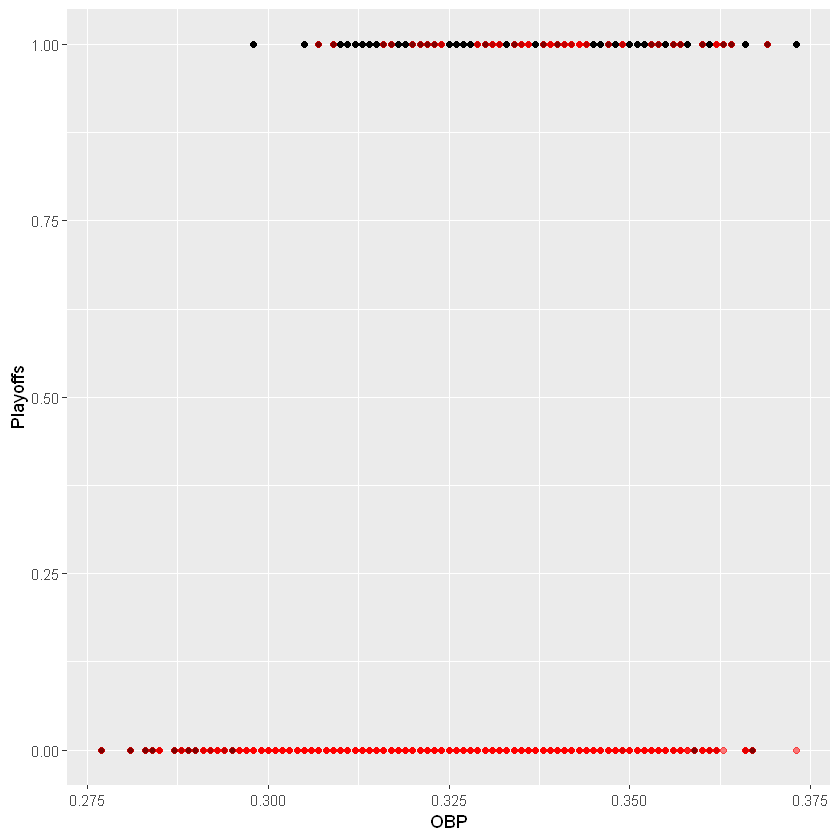

In [203]:
# OBP
ggplot(df_cleaned) +
    geom_point(aes(x=OBP, y=Playoffs)) +
    geom_point(aes(x=OBP, y=Champion), color = 'red', alpha = 0.5)

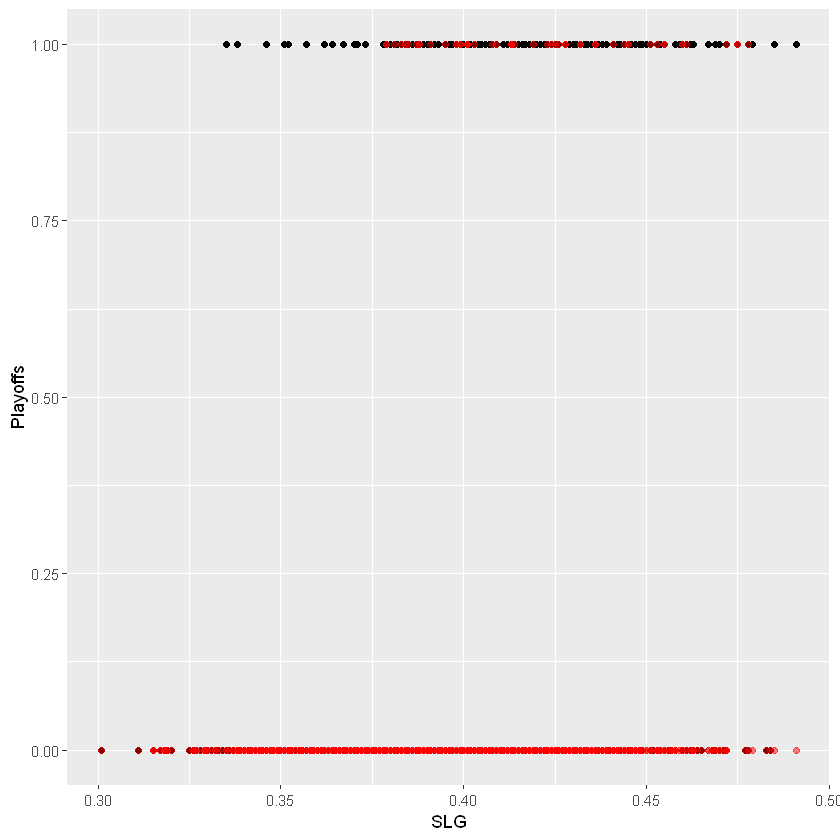

In [204]:
# SLG
ggplot(df_cleaned) +
    geom_point(aes(x=SLG, y=Playoffs)) +
    geom_point(aes(x=SLG, y=Champion), color = 'red', alpha=0.5)

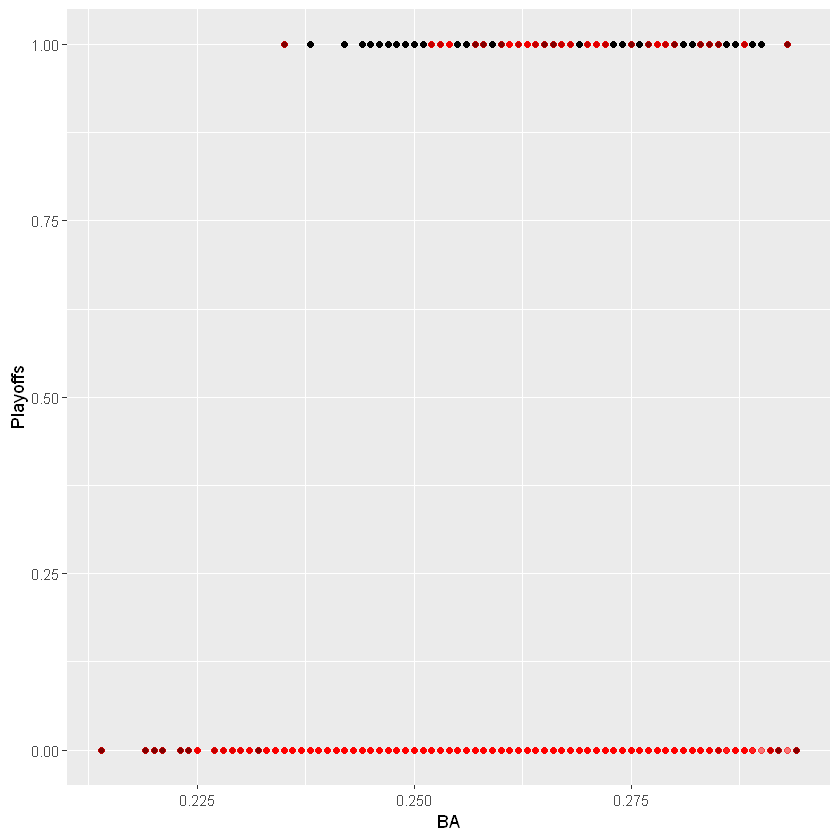

In [205]:
# SLG
ggplot(df_cleaned) +
    geom_point(aes(x=BA, y=Playoffs)) +
    geom_point(aes(x=BA, y=Champion), color = 'red', alpha=0.5)

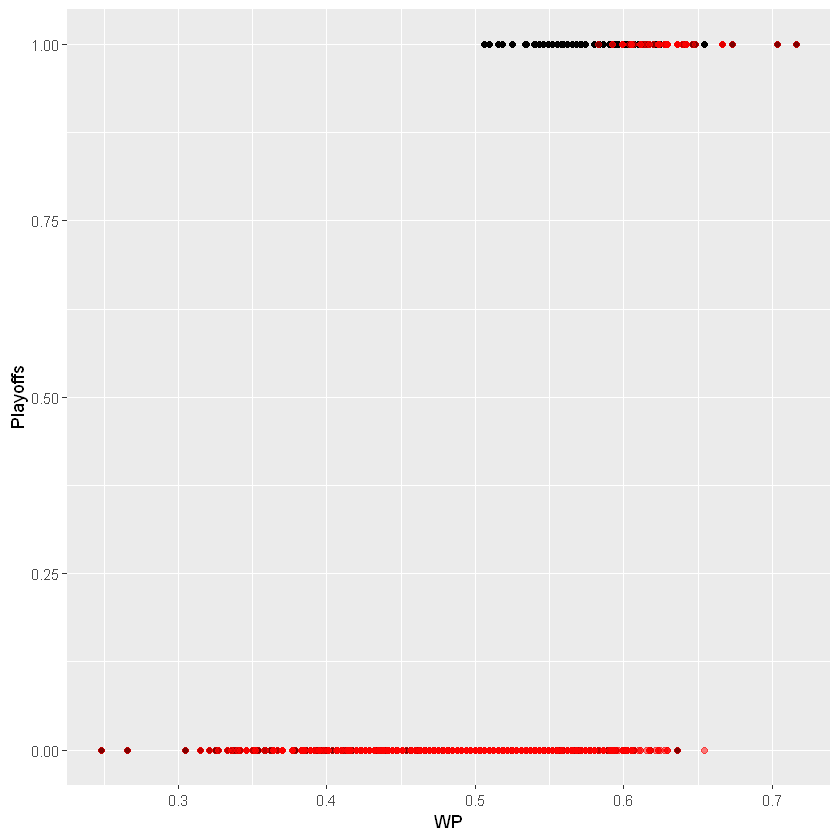

In [206]:
# WP
ggplot(df_cleaned) +
    geom_point(aes(x=WP, y=Playoffs)) +
    geom_point(aes(x=WP, y=Champion), color = 'red', alpha=0.5)

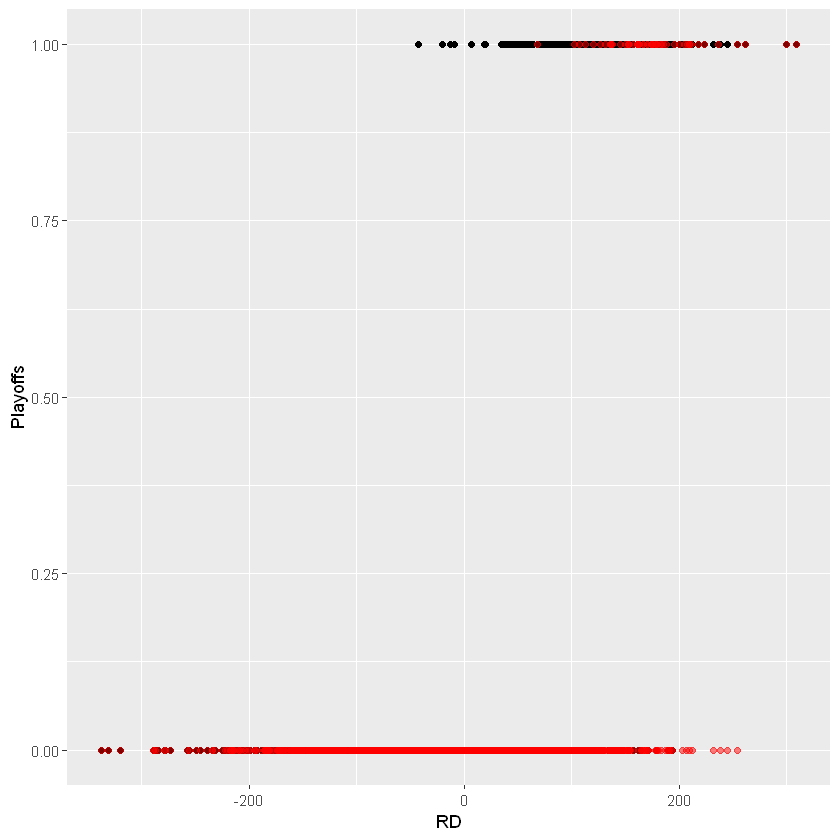

In [207]:
# RD
ggplot(df_cleaned) +
    geom_point(aes(x=RD, y=Playoffs)) +
    geom_point(aes(x=RD, y=Champion), color = 'red', alpha=0.5)

# Full Model

In [208]:
head(df_cleaned)

Year,League,OBP,SLG,BA,WP,RD,OOBP,OSLG,Playoffs,Champion
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,NL,0.328,0.418,0.259,0.5000000,46,0.317,0.415,0,0
2012,NL,0.320,0.389,0.247,0.5802469,100,0.306,0.378,1,0
2012,AL,0.311,0.417,0.247,0.5740741,7,0.315,0.403,1,0
2012,AL,0.315,0.415,0.260,0.4259259,-72,0.331,0.428,0,0
2012,NL,0.302,0.378,0.240,0.3765432,-146,0.335,0.424,0,0
2012,AL,0.318,0.422,0.255,0.5246914,72,0.319,0.405,0,0


In [209]:
df_full <- df_cleaned %>% select(-c(OOBP, OSLG))

In [210]:
head(df_full)

Year,League,OBP,SLG,BA,WP,RD,Playoffs,Champion
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,NL,0.328,0.418,0.259,0.5000000,46,0,0
2012,NL,0.320,0.389,0.247,0.5802469,100,1,0
2012,AL,0.311,0.417,0.247,0.5740741,7,1,0
2012,AL,0.315,0.415,0.260,0.4259259,-72,0,0
2012,NL,0.302,0.378,0.240,0.3765432,-146,0,0
2012,AL,0.318,0.422,0.255,0.5246914,72,0,0


In [211]:
df_full_playoffs <- df_full %>% select(-c(Year, Champion))
df_full_champion <- df_full %>% select(-c(Year, Playoffs))

In [212]:
head(df_full_playoffs)
head(df_full_champion)

League,OBP,SLG,BA,WP,RD,Playoffs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NL,0.328,0.418,0.259,0.5000000,46,0
NL,0.320,0.389,0.247,0.5802469,100,1
AL,0.311,0.417,0.247,0.5740741,7,1
AL,0.315,0.415,0.260,0.4259259,-72,0
NL,0.302,0.378,0.240,0.3765432,-146,0
AL,0.318,0.422,0.255,0.5246914,72,0


League,OBP,SLG,BA,WP,RD,Champion
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NL,0.328,0.418,0.259,0.5000000,46,0
NL,0.320,0.389,0.247,0.5802469,100,0
AL,0.311,0.417,0.247,0.5740741,7,0
AL,0.315,0.415,0.260,0.4259259,-72,0
NL,0.302,0.378,0.240,0.3765432,-146,0
AL,0.318,0.422,0.255,0.5246914,72,0


In [213]:
#training and test set
set.seed(42)
n = floor(0.8 * nrow(df_full)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df_full)), size = n) #randomly sample indicies to be included in the training set
# playoffs
train_playoffs = df_full_playoffs[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_playoffs = df_full_playoffs[-index, ] #set the testing set to be the remaining rows
# champions
train_champion = df_full_champion[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_champion = df_full_champion[-index, ] #set the testing set to be the remaining rows

In [214]:
# playoffs - full
glmod_full <- glm(data=train_playoffs, Playoffs ~ ., family = binomial)
summary(glmod_full)


Call:
glm(formula = Playoffs ~ ., family = binomial, data = train_playoffs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -44.778452   5.705811  -7.848 4.23e-15 ***
LeagueNL      0.576017   0.265567   2.169  0.03008 *  
OBP          23.042641  16.933773   1.361  0.17359    
SLG          18.113872   6.568920   2.758  0.00582 ** 
BA          -13.037005  18.931169  -0.689  0.49104    
WP           58.124971   6.957828   8.354  < 2e-16 ***
RD           -0.001093   0.003983  -0.274  0.78384    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 988.56  on 984  degrees of freedom
Residual deviance: 403.68  on 978  degrees of freedom
AIC: 417.68

Number of Fisher Scoring iterations: 7


In [215]:
# playoffs - remove RD
glmod_1 <- update(glmod_full, . ~ . -RD)
summary(glmod_1)


Call:
glm(formula = Playoffs ~ League + OBP + SLG + BA + WP, family = binomial, 
    data = train_playoffs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -43.8306     4.5146  -9.709  < 2e-16 ***
LeagueNL      0.5772     0.2655   2.174  0.02970 *  
OBP          22.5754    16.8554   1.339  0.18045    
SLG          17.9396     6.5371   2.744  0.00606 ** 
BA          -13.1297    18.9293  -0.694  0.48792    
WP           56.7230     4.6777  12.126  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 988.56  on 984  degrees of freedom
Residual deviance: 403.76  on 979  degrees of freedom
AIC: 415.76

Number of Fisher Scoring iterations: 7


In [216]:
# playoffs - remove BA
glmod_2 <- update(glmod_1, . ~ . -BA)
summary(glmod_2)


Call:
glm(formula = Playoffs ~ League + OBP + SLG + WP, family = binomial, 
    data = train_playoffs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -44.4839     4.4265 -10.049  < 2e-16 ***
LeagueNL      0.5725     0.2652   2.158  0.03089 *  
OBP          15.9447    13.8918   1.148  0.25106    
SLG          16.4931     6.1801   2.669  0.00761 ** 
WP           56.7049     4.6704  12.141  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 988.56  on 984  degrees of freedom
Residual deviance: 404.24  on 980  degrees of freedom
AIC: 414.24

Number of Fisher Scoring iterations: 7


In [217]:
# playoffs - remove OBP
glmod_3 <- update(glmod_2, . ~ . -OBP)

Questions:

- differences in interpretations vs linear modeling
- what exactly do the *betas* here mean in terms of writing a function
- is there a regsubsets type method for glm?

In [218]:
head(test_playoffs)

League,OBP,SLG,BA,WP,RD,Playoffs
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AL,0.315,0.415,0.260,0.4259259,-72,0
NL,0.302,0.378,0.240,0.3765432,-146,0
NL,0.315,0.411,0.251,0.5987654,81,1
NL,0.330,0.436,0.274,0.3950617,-132,0
AL,0.317,0.400,0.265,0.4444444,-70,0
NL,0.308,0.382,0.244,0.4259259,-115,0


In [219]:
glmod_playoffs <- glmod_3
summary(glmod_playoffs)
summary(resid(glmod_playoffs, type = "deviance"))


Call:
glm(formula = Playoffs ~ League + SLG + WP, family = binomial, 
    data = train_playoffs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -41.3967     3.4141 -12.125  < 2e-16 ***
LeagueNL      0.5322     0.2623   2.029   0.0425 *  
SLG          21.4951     4.4310   4.851 1.23e-06 ***
WP           57.0461     4.6484  12.272  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 988.56  on 984  degrees of freedom
Residual deviance: 405.56  on 981  degrees of freedom
AIC: 413.56

Number of Fisher Scoring iterations: 7


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.031228 -0.266706 -0.059213 -0.051462 -0.003901  3.018324 

**Note: want to perform metrics on all models**

For binomial regression goodness of fit, we use:

- likelihood ratio statistic
- deviance
- saturated deviance
- comparing models of different sizes: `anova(glm-reduced, glm-full, test = "Chisq")`

In [220]:
# null: reduced model is sufficient
# alternative: reduced model is not sufficient
anova(glmod_playoffs, glmod_full, test = 'Chisq')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,981,405.5643,NA,NA,NA
2,978,403.6823,3,1.881994,0.5972568


Since the p-value is above the usual threshold of $\alpha = 0.05$, we do not have enough evidence to reject the null model, thus we can say that the reduced model is sufficient.

In [221]:
AIC(glmod_full, glmod_playoffs)

,df,AIC
,<dbl>,<dbl>
glmod_full,7,417.6823
glmod_playoffs,4,413.5643


In [222]:
glmod_playoffs$coefficients
glmod_playoffs$deviance
glmod_playoffs$df.residual

(Intercept)    LeagueNL         SLG          WP 
 -41.396668    0.532213   21.495080   57.046120

[1] 405.5643

[1] 981

Residual deviance compares a model with the one that fits the data perfectly.

Use the chi-squared distribution for the following hypothesis test:

- $H_0$: the model fits the data perfectly
- $H_a$: the model does not fit the data perfectly

In [223]:
1 - pchisq(glmod_playoffs$deviance, glmod_playoffs$df.residual)

[1] 1

Because the p-value is higher than our usual threshold, we cannot reject the null hypothesis that the model fits the data as well as the perfect model.

In [224]:
head(train_champion)

League,OBP,SLG,BA,WP,RD,Champion
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NL,0.328,0.393,0.258,0.5802469,105,0
AL,0.339,0.432,0.261,0.6358025,146,1
NL,0.308,0.372,0.249,0.5644172,94,0
AL,0.284,0.311,0.228,0.4135802,-64,0
NL,0.313,0.385,0.252,0.5828221,89,0
AL,0.320,0.384,0.257,0.4506173,-34,0


In [225]:
# champion - full
glmod_full <- glm(data=train_champion, Champion ~ ., family = binomial)
summary(glmod_full)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Champion ~ ., family = binomial, data = train_champion)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -58.405352  14.290620  -4.087 4.37e-05 ***
LeagueNL     -0.808964   0.566566  -1.428    0.153    
OBP          31.824925  40.264162   0.790    0.429    
SLG          19.753047  15.802595   1.250    0.211    
BA          -71.205968  49.474334  -1.439    0.150    
WP           94.022004  18.406970   5.108 3.26e-07 ***
RD            0.003020   0.008549   0.353    0.724    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.303  on 984  degrees of freedom
Residual deviance:  99.352  on 978  degrees of freedom
AIC: 113.35

Number of Fisher Scoring iterations: 10


What does the warning message mean?

In some cases, you can simply ignore this warning message because it doesn’t necessarily indicate that something is wrong with the logistic regression model. It simply means that one or more observations in the data frame have predicted values indistinguishable from 0 or 1.

Other Techniques:

- increase sample size
- remove outliers

In [226]:
# champion - remove RD
glmod_1 <- update(glmod_full, . ~ . -RD)
summary(glmod_1)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Champion ~ League + OBP + SLG + BA + WP, family = binomial, 
    data = train_champion)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -61.5108    11.4505  -5.372 7.79e-08 ***
LeagueNL     -0.8133     0.5667  -1.435    0.151    
OBP          34.4301    39.6068   0.869    0.385    
SLG          19.5662    15.8502   1.234    0.217    
BA          -69.2418    49.2742  -1.405    0.160    
WP           97.7026    15.3956   6.346 2.21e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.303  on 984  degrees of freedom
Residual deviance:  99.476  on 979  degrees of freedom
AIC: 111.48

Number of Fisher Scoring iterations: 10


In [227]:
# champion - remove OBP
glmod_2 <- update(glmod_1, . ~ . -OBP)
summary(glmod_2)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Champion ~ League + SLG + BA + WP, family = binomial, 
    data = train_champion)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -58.3213    10.4887  -5.560 2.69e-08 ***
LeagueNL     -0.8713     0.5657  -1.540    0.124    
SLG          23.1408    15.2749   1.515    0.130    
BA          -43.5810    38.6544  -1.127    0.260    
WP           97.9265    15.2317   6.429 1.28e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.30  on 984  degrees of freedom
Residual deviance: 100.24  on 980  degrees of freedom
AIC: 110.24

Number of Fisher Scoring iterations: 10


In [228]:
# champion - remove BA
glmod_3 <- update(glmod_2, . ~ . -BA)
summary(glmod_3)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Champion ~ League + SLG + WP, family = binomial, 
    data = train_champion)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -63.3126     9.6944  -6.531 6.54e-11 ***
LeagueNL     -0.9118     0.5618  -1.623    0.105    
SLG           9.5145     9.1298   1.042    0.297    
WP           96.3971    14.7849   6.520 7.03e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.30  on 984  degrees of freedom
Residual deviance: 101.51  on 981  degrees of freedom
AIC: 109.51

Number of Fisher Scoring iterations: 10


In [229]:
# champion - remove SLG
glmod_4 <- update(glmod_3, . ~ . -SLG)
summary(glmod_4)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Champion ~ League + WP, family = binomial, data = train_champion)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -59.9694     8.9092  -6.731 1.68e-11 ***
LeagueNL     -1.0104     0.5511  -1.833   0.0667 .  
WP           97.5490    14.7657   6.606 3.94e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.30  on 984  degrees of freedom
Residual deviance: 102.63  on 982  degrees of freedom
AIC: 108.63

Number of Fisher Scoring iterations: 10


In [230]:
# champion - remove League
glmod_5 <- update(glmod_4, . ~ . -League)
summary(glmod_5)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Call:
glm(formula = Champion ~ WP, family = binomial, data = train_champion)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -56.631      7.983  -7.094 1.30e-12 ***
WP            91.247     13.092   6.969 3.18e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 328.30  on 984  degrees of freedom
Residual deviance: 106.24  on 983  degrees of freedom
AIC: 110.24

Number of Fisher Scoring iterations: 10


In [231]:
predict(glmod_4, test_champion, se = T, type = 'response')

$fit
           1            2            3            4            5            6 
9.999433e-09 2.944874e-11 7.104059e-02 1.793096e-10 6.088528e-08 3.640535e-09 
           7            8            9           10           11           12 
1.854141e-02 1.111795e-07 1.240373e-02 3.093061e-03 2.789738e-04 2.697128e-10 
          13           14           15           16           17           18 
4.500528e-07 2.030191e-07 2.216675e-08 1.015852e-04 1.696228e-03 2.740308e-06 
          19           20           21           22           23           24 
1.015852e-04 1.527939e-04 4.925086e-10 4.121893e-06 1.349705e-07 2.216675e-08 
          25           26           27           28           29           30 
7.391399e-08 7.391399e-08 5.612034e-01 6.717889e-04 4.907627e-07 1.091794e-09 
          31           32           33           34           35           36 
3.046748e-05 1.031624e-01 9.296198e-04 4.450708e-04 1.825945e-08 3.093061e-03 
          37           38           39           40           41           42 
8.218179e-07 1.696228e-03 1.349705e-07 7.104059e-02 3.274900e-07 4.119023e-01 
          43           44           45           46           47           48 
3.334264e-08 1.668515e-05 1.349705e-07 7.526750e-06 2.772264e-01 6.088528e-08 
          49           50           51           52           53           54 
1.023973e-02 7.001898e-01 3.852821e-09 3.640535e-09 5.475995e-09 2.058454e-03 
          55           56           57           58           59           60 
1.854839e-04 1.993668e-09 5.563370e-05 1.225330e-01 1.854141e-02 1.374413e-05 
          61           62           63           64           65           66 
8.218179e-07 6.088528e-08 3.386507e-04 2.697128e-10 5.978995e-10 2.464627e-07 
          67           68           69           70           71           72 
9.137370e-06 8.245749e-02 8.100532e-01 1.015852e-04 6.830991e-03 1.111795e-07 
          73           74           75           76           77           78 
4.064181e-05 7.050254e-04 7.899745e-03 3.640535e-09 1.091794e-09 1.735870e-01 
          79           80           81           82           83           84 
1.294351e-08 7.104059e-02 1.100198e-06 7.391399e-08 1.015852e-04 1.786740e-07 
          85           86           87           88           89           90 
5.926043e-02 1.527939e-04 3.274281e-10 4.121893e-06 4.500528e-07 8.993446e-10 
          91           92           93           94           95           96 
1.825945e-08 6.717889e-04 4.595396e-01 2.772264e-01 1.015197e-05 3.046748e-05 
          97           98           99          100          101          102 
3.021901e-06 8.218179e-07 3.386507e-04 1.031624e-01 4.047756e-08 1.236156e-06 
         103          104          105          106          107          108 
4.019575e-02 1.527939e-04 3.386507e-04 4.047756e-08 8.381147e-01 7.526750e-06 
         109          110          111          112          113          114 
1.091794e-09 8.796802e-03 9.296198e-04 2.789738e-04 1.225330e-01 6.088528e-08 
         115          116          117          118          119          120 
6.769573e-07 9.137370e-06 2.998822e-09 3.274281e-10 2.509716e-05 1.583125e-08 
         121          122          123          124          125          126 
6.002532e-07 3.334264e-08 8.368039e-05 4.582767e-05 1.527939e-04 8.995141e-07 
         127          128          129          130          131          132 
4.500528e-07 4.121893e-06 2.030191e-07 2.058454e-03 8.862010e-01 5.563370e-05 
         133          134          135          136          137          138 
5.633685e-03 6.182196e-04 3.707226e-07 1.145649e-04 5.093024e-04 5.633685e-03 
         139          140          141          142          143          144 
9.342979e-01 1.054807e-04 4.712397e-09 2.464627e-07 4.047756e-08 6.088528e-08 
         145          146          147          148          149          150 
1.015852e-04 3.334264e-08 5.978995e-10 6.250827e-05 4.500528e-07 1.145649e-04 
         151          152          153       

Values larger than 1?

In [232]:
glm(data=train_champion, Champion ~ RD, family = binomial)


Call:  glm(formula = Champion ~ RD, family = binomial, data = train_champion)

Coefficients:
(Intercept)           RD  
   -7.38380      0.03915  

Degrees of Freedom: 984 Total (i.e. Null);  983 Residual
Null Deviance:	    328.3 
Residual Deviance: 150.4 	AIC: 154.4

In [233]:
df_recent <- df_cleaned[df_cleaned$Year > season_break, ]
head(df_recent)

Year,League,OBP,SLG,BA,WP,RD,OOBP,OSLG,Playoffs,Champion
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,NL,0.328,0.418,0.259,0.5000000,46,0.317,0.415,0,0
2012,NL,0.320,0.389,0.247,0.5802469,100,0.306,0.378,1,0
2012,AL,0.311,0.417,0.247,0.5740741,7,0.315,0.403,1,0
2012,AL,0.315,0.415,0.260,0.4259259,-72,0.331,0.428,0,0
2012,NL,0.302,0.378,0.240,0.3765432,-146,0.335,0.424,0,0
2012,AL,0.318,0.422,0.255,0.5246914,72,0.319,0.405,0,0


In [234]:
df_recent_playoffs <- df_recent %>% select(-c(Year, Champion))
df_recent_champion <- df_recent %>% select(-c(Year, Playoffs))

In [235]:
#training and test set
set.seed(42)
n = floor(0.8 * nrow(df_recent)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df_recent)), size = n) #randomly sample indicies to be included in the training set
# playoffs
train_playoffs = df_recent_playoffs[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_playoffs = df_recent_playoffs[-index, ] #set the testing set to be the remaining rows
# champions
train_champion = df_recent_champion[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_champion = df_recent_champion[-index, ] #set the testing set to be the remaining rows

In [236]:
# playoffs - recent
glmod_full <- glm(data=train_playoffs, Playoffs ~ ., family = binomial)
summary(glmod_full)


Call:
glm(formula = Playoffs ~ ., family = binomial, data = train_playoffs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -67.186422  13.891046  -4.837 1.32e-06 ***
LeagueNL      0.534029   0.558383   0.956    0.339    
OBP          31.806063  39.949619   0.796    0.426    
SLG         -20.077959  20.157931  -0.996    0.319    
BA          -10.240652  38.803419  -0.264    0.792    
WP          109.251970  18.629852   5.864 4.51e-09 ***
RD           -0.010588   0.009693  -1.092    0.275    
OOBP         10.657172  36.793326   0.290    0.772    
OSLG         10.986604  19.889487   0.552    0.581    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 110.40  on 327  degrees of freedom
AIC: 128.4

Number of Fisher Scoring iterations: 8


In [237]:
# remove BA
glmod_red <- update(glmod_full, . ~ . -BA)
summary(glmod_red)


Call:
glm(formula = Playoffs ~ League + OBP + SLG + WP + RD + OOBP + 
    OSLG, family = binomial, data = train_playoffs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -68.084555  13.543409  -5.027 4.98e-07 ***
LeagueNL      0.556905   0.551006   1.011    0.312    
OBP          26.237931  33.889160   0.774    0.439    
SLG         -21.516933  19.368233  -1.111    0.267    
WP          109.533718  18.620202   5.883 4.04e-09 ***
RD           -0.010482   0.009658  -1.085    0.278    
OOBP         12.795047  35.871570   0.357    0.721    
OSLG         10.473345  19.717429   0.531    0.595    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 110.47  on 328  degrees of freedom
AIC: 126.47

Number of Fisher Scoring iterations: 8


In [238]:
# remove OOBP
glmod_red <- update(glmod_red, . ~ . -OOBP)
summary(glmod_red)


Call:
glm(formula = Playoffs ~ League + OBP + SLG + WP + RD + OSLG, 
    family = binomial, data = train_playoffs)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -66.69758   12.95341  -5.149 2.62e-07 ***
LeagueNL      0.59991    0.53720   1.117    0.264    
OBP          31.01663   31.32714   0.990    0.322    
SLG         -19.53807   18.59133  -1.051    0.293    
WP          109.06744   18.58293   5.869 4.38e-09 ***
RD           -0.01159    0.00913  -1.270    0.204    
OSLG         11.99370   19.23645   0.623    0.533    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 110.60  on 329  degrees of freedom
AIC: 124.6

Number of Fisher Scoring iterations: 8


In [239]:
# remove OOBP
glmod_red <- update(glmod_red, . ~ . -OSLG)
summary(glmod_red)


Call:
glm(formula = Playoffs ~ League + OBP + SLG + WP + RD, family = binomial, 
    data = train_playoffs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -67.119409  12.901289  -5.203 1.97e-07 ***
LeagueNL      0.601881   0.536879   1.121   0.2623    
OBP          41.106788  26.775192   1.535   0.1247    
SLG         -13.652746  16.024757  -0.852   0.3942    
WP          108.314624  18.391374   5.889 3.88e-09 ***
RD           -0.014393   0.007932  -1.814   0.0696 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 110.99  on 330  degrees of freedom
AIC: 122.99

Number of Fisher Scoring iterations: 8


In [240]:
# remove SLG
glmod_red <- update(glmod_red, . ~ . -SLG)
summary(glmod_red)


Call:
glm(formula = Playoffs ~ League + OBP + WP + RD, family = binomial, 
    data = train_playoffs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -67.375136  12.897750  -5.224 1.75e-07 ***
LeagueNL      0.728356   0.516546   1.410   0.1585    
OBP          26.419087  20.087790   1.315   0.1884    
WP          107.076705  18.177725   5.891 3.85e-09 ***
RD           -0.014720   0.007944  -1.853   0.0639 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 111.73  on 331  degrees of freedom
AIC: 121.73

Number of Fisher Scoring iterations: 8


In [241]:
# remove OBP
glmod_red <- update(glmod_red, . ~ . -OBP)
summary(glmod_red)


Call:
glm(formula = Playoffs ~ League + WP + RD, family = binomial, 
    data = train_playoffs)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -56.67402    9.34064  -6.067 1.30e-09 ***
LeagueNL      0.59147    0.50099   1.181    0.238    
WP          103.44514   17.55223   5.894 3.78e-09 ***
RD           -0.01117    0.00737  -1.515    0.130    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 113.51  on 332  degrees of freedom
AIC: 121.51

Number of Fisher Scoring iterations: 8


In [242]:
# remove League
glmod_red <- update(glmod_red, . ~ . -League)
summary(glmod_red)


Call:
glm(formula = Playoffs ~ WP + RD, family = binomial, data = train_playoffs)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -54.985543   9.123310  -6.027 1.67e-09 ***
WP          100.989782  17.268945   5.848 4.97e-09 ***
RD           -0.011562   0.007336  -1.576    0.115    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 114.94  on 333  degrees of freedom
AIC: 120.94

Number of Fisher Scoring iterations: 8


In [243]:
# remove League
glmod_red <- update(glmod_red, . ~ . -WP)
summary(glmod_red)


Call:
glm(formula = Playoffs ~ RD, family = binomial, data = train_playoffs)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.70033    0.35292  -7.651 1.99e-14 ***
RD           0.03256    0.00410   7.940 2.03e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 187.80  on 334  degrees of freedom
AIC: 191.8

Number of Fisher Scoring iterations: 7


In [244]:
anova(glmod_red, glmod_full, test = 'Chisq')

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,334,187.7997,NA,NA,NA
2,327,110.4016,7,77.39807,4.667859e-14


In [245]:
head(df_recent)

Year,League,OBP,SLG,BA,WP,RD,OOBP,OSLG,Playoffs,Champion
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,NL,0.328,0.418,0.259,0.5000000,46,0.317,0.415,0,0
2012,NL,0.320,0.389,0.247,0.5802469,100,0.306,0.378,1,0
2012,AL,0.311,0.417,0.247,0.5740741,7,0.315,0.403,1,0
2012,AL,0.315,0.415,0.260,0.4259259,-72,0.331,0.428,0,0
2012,NL,0.302,0.378,0.240,0.3765432,-146,0.335,0.424,0,0
2012,AL,0.318,0.422,0.255,0.5246914,72,0.319,0.405,0,0


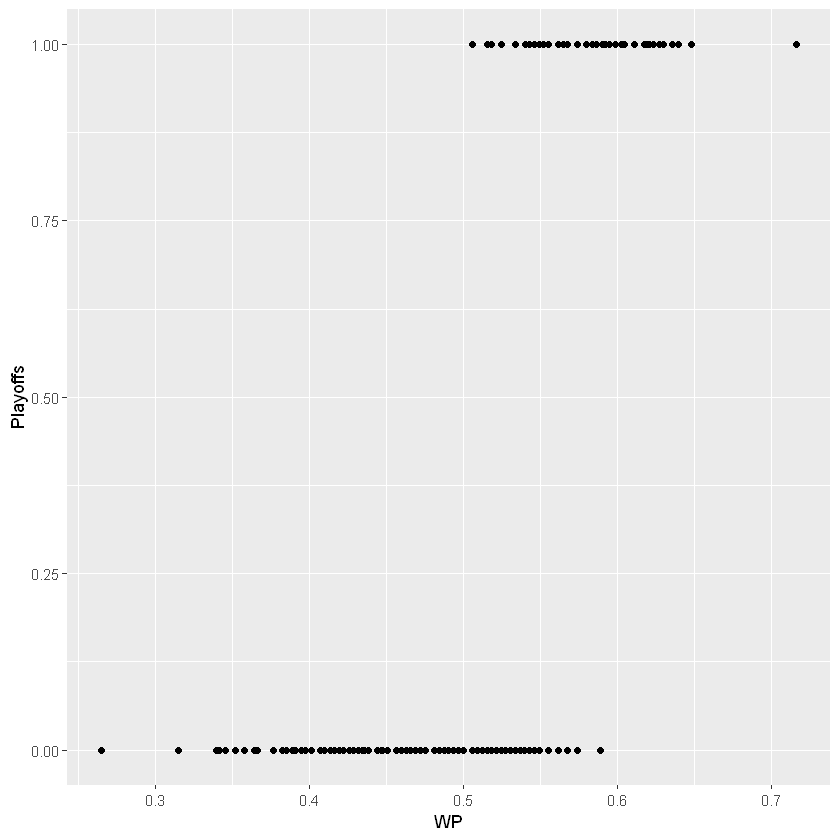

In [246]:
ggplot(df_recent) +
    geom_point(aes(x=WP, y=Playoffs))

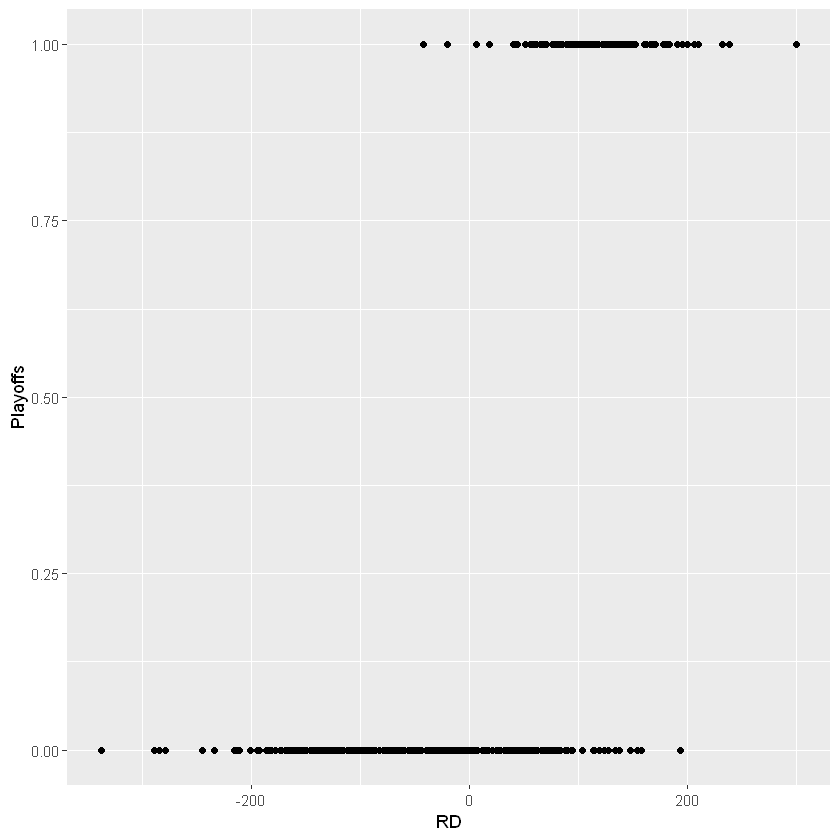

In [247]:
ggplot(df_recent) +
    geom_point(aes(x=RD, y=Playoffs))

In [248]:
names(df_recent)

[1] "Year"     "League"   "OBP"      "SLG"      "BA"       "WP"      
 [7] "RD"       "OOBP"     "OSLG"     "Playoffs" "Champion"

In [249]:
df_recent_playoffs <- df_recent %>% select(-c(League, Year, Champion))
df_recent_champion <- df_recent %>% select(-c(League, Year, Playoffs))

In [250]:
df_recent_playoffs_long <- pivot_longer(df_recent_playoffs,
                                 cols = names(df_recent_playoffs %>% select(-c(Playoffs))),
                                 names_to = 'feature_names',
                                 values_to = 'feature_values')
df_recent_champion_long <- pivot_longer(df_recent_champion,
                                 cols = names(df_recent_champion %>% select(-c(Champion))),
                                 names_to = 'feature_names',
                                 values_to = 'feature_values')

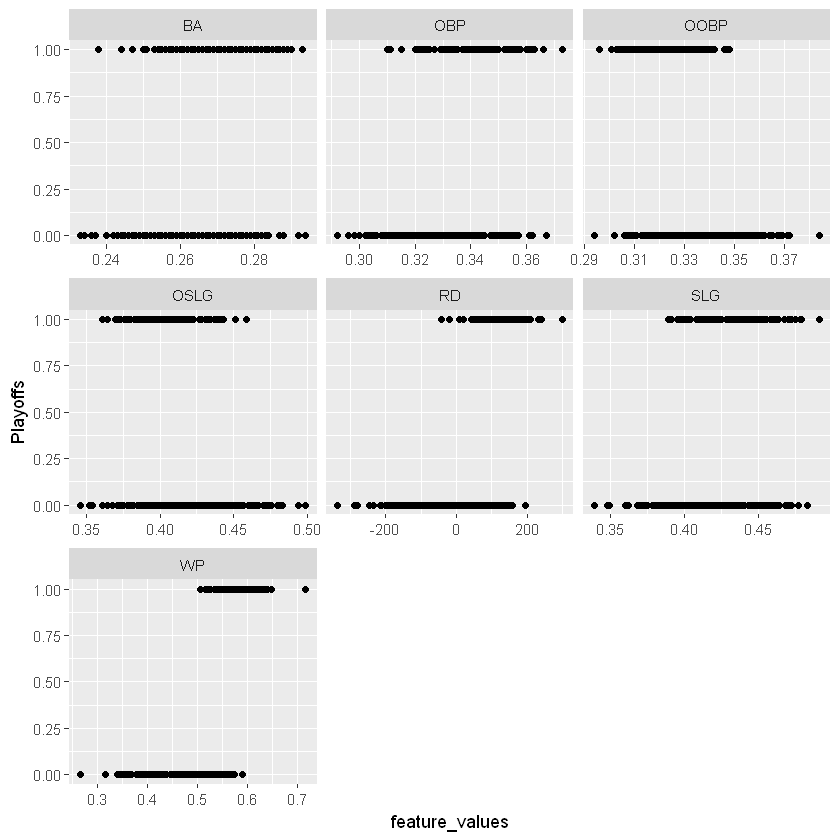

In [251]:
ggplot(df_recent_playoffs_long, aes(x=feature_values, y=Playoffs)) +
    geom_point() +
    facet_wrap(~ feature_names, scales = 'free_x')

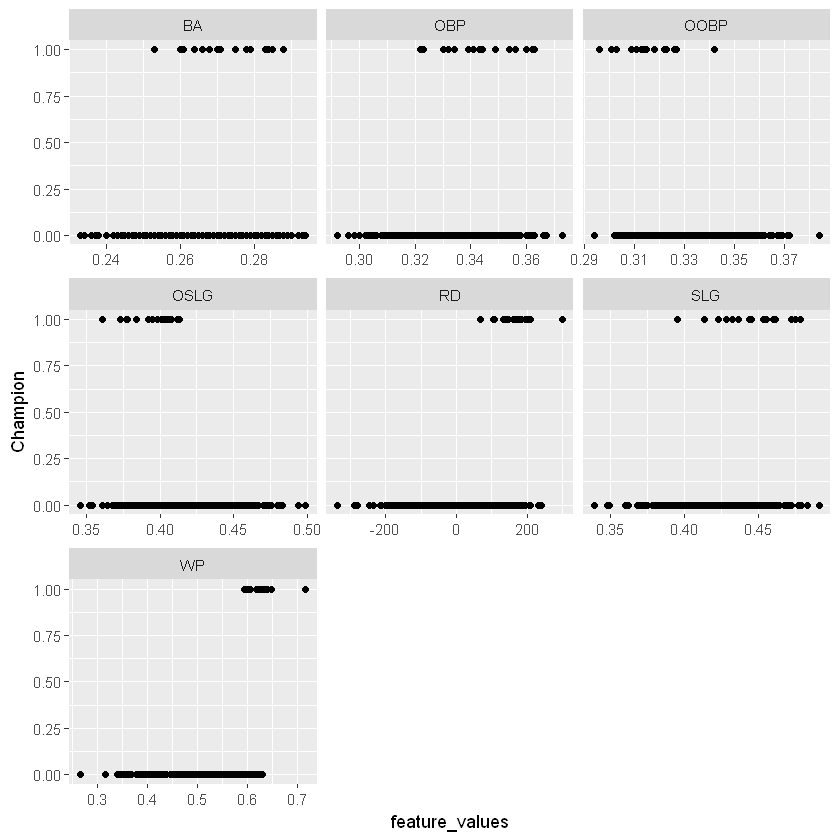

In [252]:
ggplot(df_recent_champion_long, aes(x=feature_values, y=Champion)) +
    geom_point() +
    facet_wrap(~ feature_names, scales = 'free_x')

In [253]:
head(df_full)

Year,League,OBP,SLG,BA,WP,RD,Playoffs,Champion
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2012,NL,0.328,0.418,0.259,0.5000000,46,0,0
2012,NL,0.320,0.389,0.247,0.5802469,100,1,0
2012,AL,0.311,0.417,0.247,0.5740741,7,1,0
2012,AL,0.315,0.415,0.260,0.4259259,-72,0,0
2012,NL,0.302,0.378,0.240,0.3765432,-146,0,0
2012,AL,0.318,0.422,0.255,0.5246914,72,0,0


In [254]:
df_full_playoffs <- df_full %>% select(-c(League, Year, Champion))
df_full_champion <- df_full %>% select(-c(League, Year, Playoffs))

In [255]:
df_full_playoffs_long <- pivot_longer(df_full_playoffs,
                                 cols = names(df_full_playoffs %>% select(-c(Playoffs))),
                                 names_to = 'feature_names',
                                 values_to = 'feature_values')
df_full_champion_long <- pivot_longer(df_full_champion,
                                 cols = names(df_full_champion %>% select(-c(Champion))),
                                 names_to = 'feature_names',
                                 values_to = 'feature_values')

In [256]:
head(df_full_playoffs_long)

Playoffs,feature_names,feature_values
<dbl>,<chr>,<dbl>
0,OBP,0.328
0,SLG,0.418
0,BA,0.259
0,WP,0.500
0,RD,46.000
1,OBP,0.320


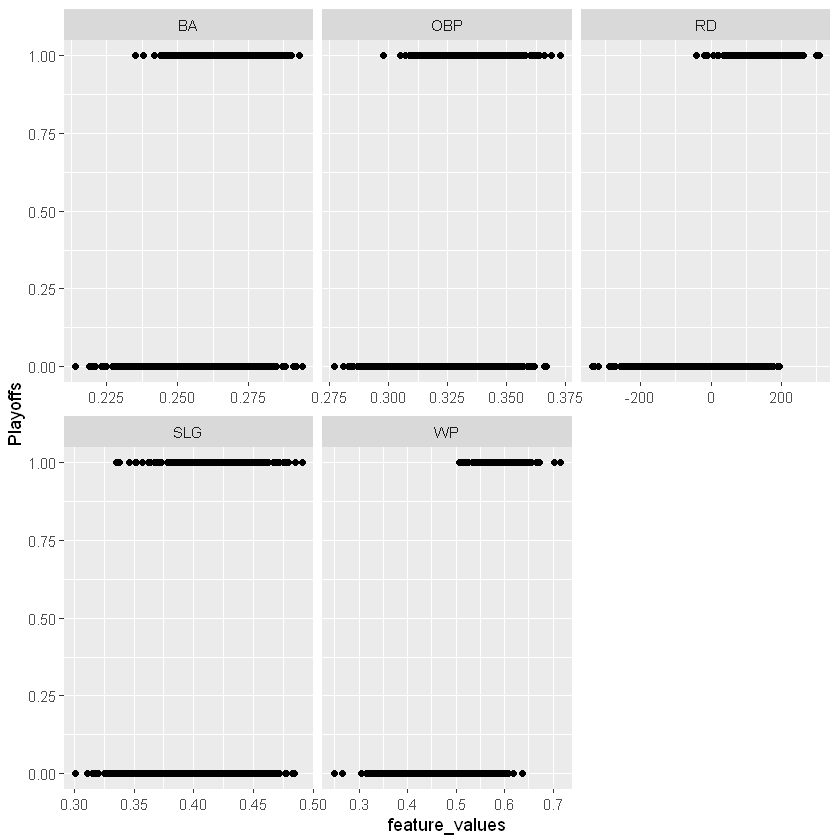

In [257]:
ggplot(df_full_playoffs_long, aes(x=feature_values, y=Playoffs)) +
    geom_point() +
    facet_wrap(~ feature_names, scales = 'free_x')

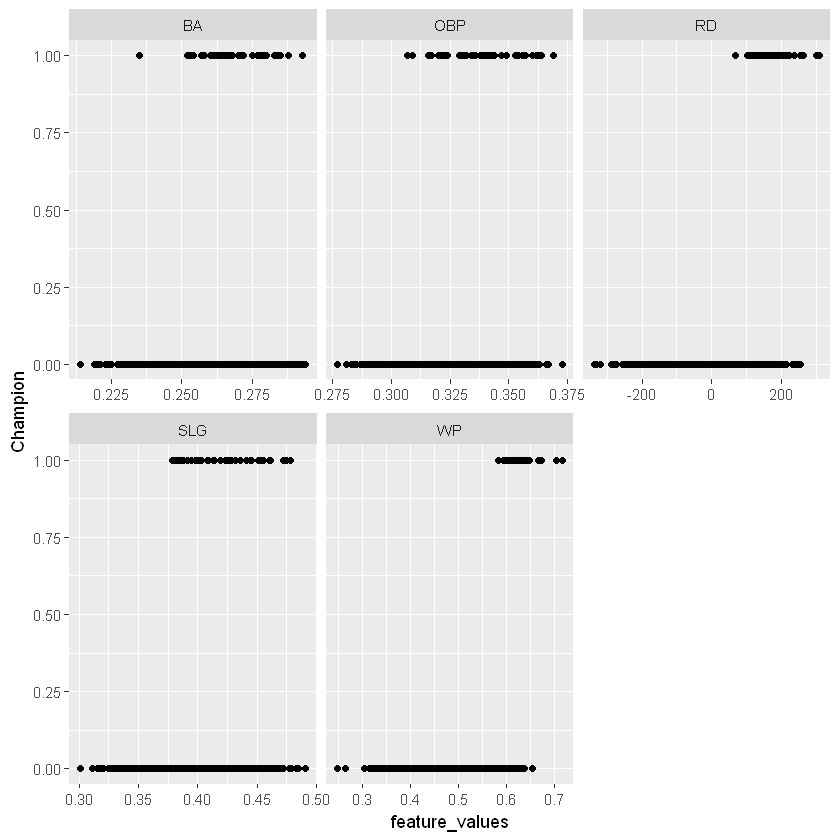

In [258]:
ggplot(df_full_champion_long, aes(x=feature_values, y=Champion)) +
    geom_point() +
    facet_wrap(~ feature_names, scales = 'free_x')

# FINALLY, SOME RESULTS!

Next, let's create a function for backwards selection based on p-value, which does the following:

reports:

- AIC
- Null Deviance
- Residual Deviance
- Remaining Variables p-values
- anova test p-value

In [259]:
# create a model and plot from a strong visual above. let's try WP from recent playoffs
#training and test set
set.seed(42)
n = floor(0.8 * nrow(df_recent)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df_recent_playoffs)), size = n) #randomly sample indicies to be included in the training set
# playoffs
train = df_recent_playoffs[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = df_recent_playoffs[-index, ] #set the testing set to be the remaining rows
# model
glmod <- glm(data = train, Playoffs ~ WP, family = binomial)

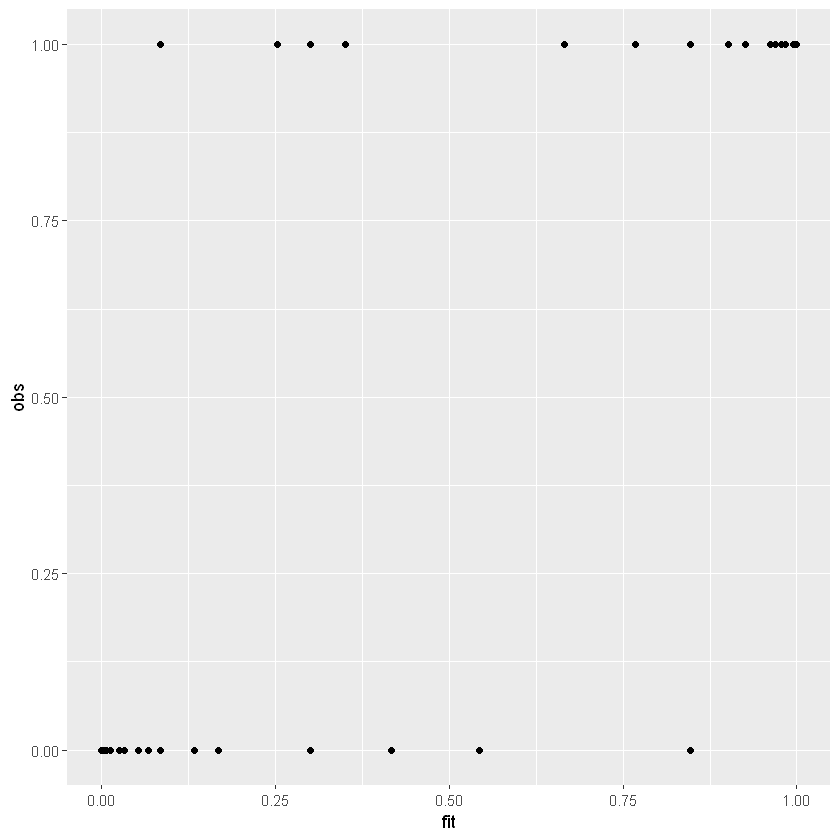

In [260]:
obs <- test$Playoffs
preds <- predict(glmod, test, se = T, type='response')
ggplot(data.frame(obs, preds), aes(x=fit, y=obs)) +
    geom_point()

In [261]:
summary(glmod)
summary(test$Playoffs)


Call:
glm(formula = Playoffs ~ WP, family = binomial, data = train)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -45.872      6.299  -7.283 3.27e-13 ***
WP            82.884     11.404   7.268 3.64e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.51  on 335  degrees of freedom
Residual deviance: 117.51  on 334  degrees of freedom
AIC: 121.51

Number of Fisher Scoring iterations: 8


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.2857  1.0000  1.0000 

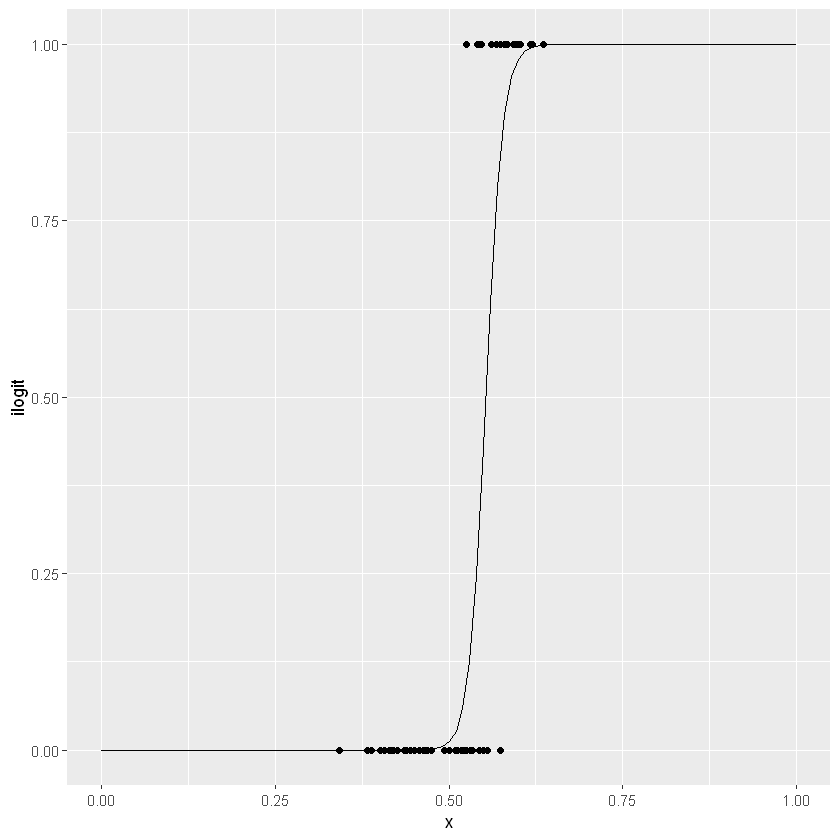

In [262]:
x <- seq(0, 1, 0.01)
eta <- -45.872 + 82.884 * x
ilogit <- exp(eta)/(1+exp(eta))
ggplot() +
    geom_line(aes(x=x,y=ilogit)) +
    geom_point(aes(x=test$WP, y=test$Playoffs))

In [263]:
# create function for backwards selection
# AIC
# Null Deviance
# Residual Deviance
# Remaining Variables p-values
# anova test p-value

In [264]:
# backwards selection to return several important metrics
backwards_glm <- function(train_data, response_var) {
    # full model
    formula <- paste(response_var, '~ .', '')
    glmod_full <- glm(data = train_data, as.formula(formula), family = binomial)
    # pvals
    pvals <- summary(glmod_full)$coefficients[, 4]
    # feature consideration
    features <- names(pvals)
    features <- features[features != '(Intercept)']
    # dataframe
    results_df <- data.frame(t(sapply(pvals, 'c')), AIC=AIC(glmod_full), RDev=glmod_full$deviance, Ftest = NA)
    
    # set glmod_full to glmod for following loop
    glmod <- glmod_full
    
    # go until last feature remains
    while (length(features) > 1) {
        # remove value with max pvalue (intercept is removed in case)
        remove_feature <- names(which.max(unlist(pvals)))
        # create text formula for update() function
        formula <- paste('.~.-', remove_feature)
        # update glm with as.formula() function
        glmod <- update(glmod, as.formula(formula))
        # pvals
        pvals <- summary(glmod)$coefficients[, 4]
        # new row for dataframe
        new_df <- data.frame(t(sapply(pvals, 'c')), AIC=AIC(glmod), RDev=glmod$deviance, Ftest=anova(glmod_full, glmod, test='Chisq')[2,5])
        # update feature consideration
        features <- names(pvals)
        features <- na.omit(features[features != '(Intercept)'])
        # update dataframe
        results_df <- bind_rows(results_df, new_df)
    }
    
    # return ending backwards selection dataframe
    return(results_df)
}

In [265]:
# model results
bs_full_playoffs <- backwards_glm(df_full_playoffs, 'Playoffs')
bs_full_champion <- backwards_glm(df_full_champion, 'Champion')
bs_recent_playoffs <- backwards_glm(df_recent_playoffs, 'Playoffs')
bs_recent_champion <- backwards_glm(df_recent_champion, 'Champion')

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


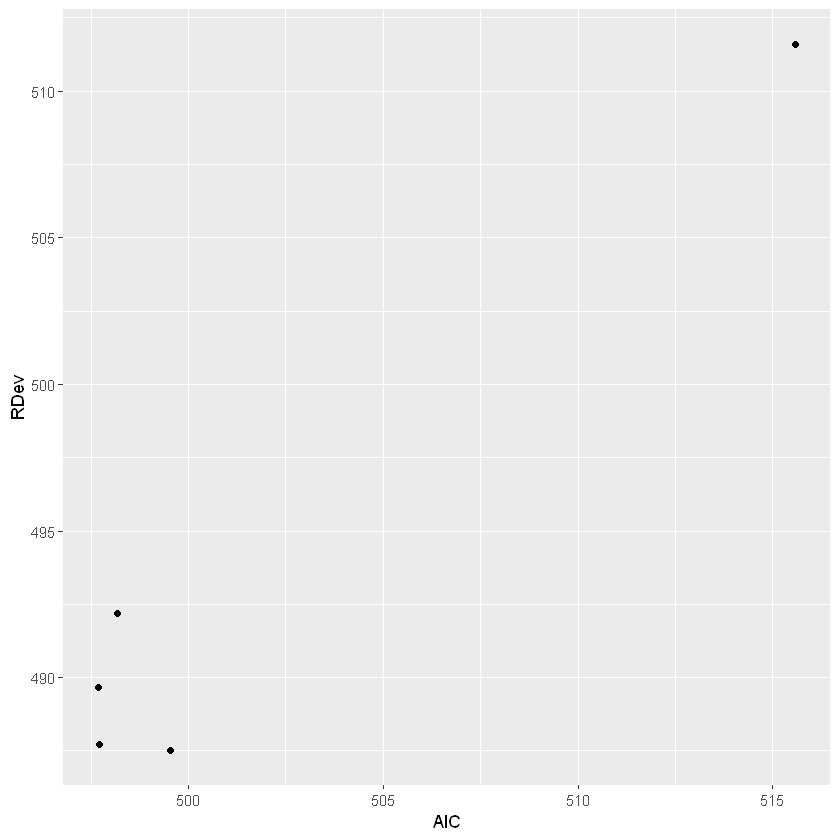

In [266]:
ggplot(bs_full_playoffs, aes(x=AIC, y=RDev)) +
    geom_point()

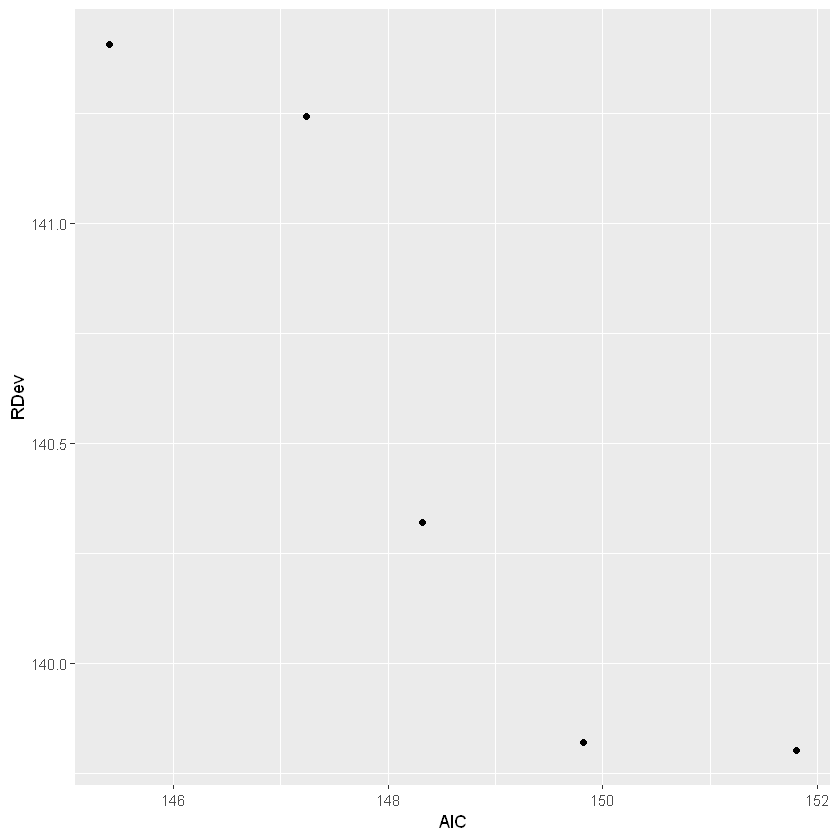

In [267]:
ggplot(bs_full_champion, aes(x=AIC, y=RDev)) +
    geom_point()

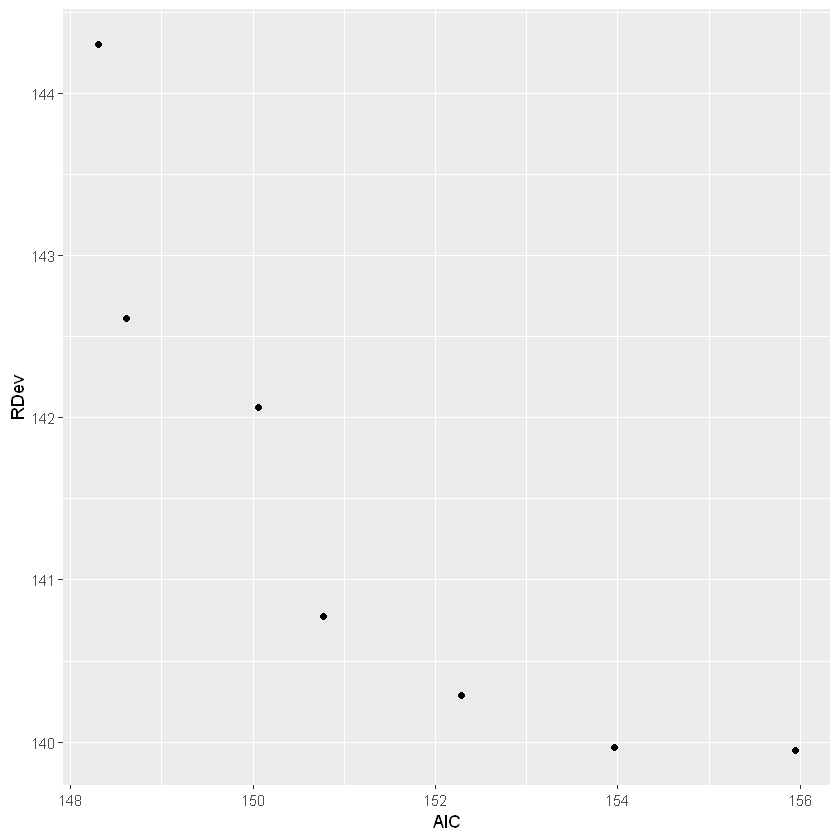

In [268]:
ggplot(bs_recent_playoffs, aes(x=AIC, y=RDev)) +
    geom_point()

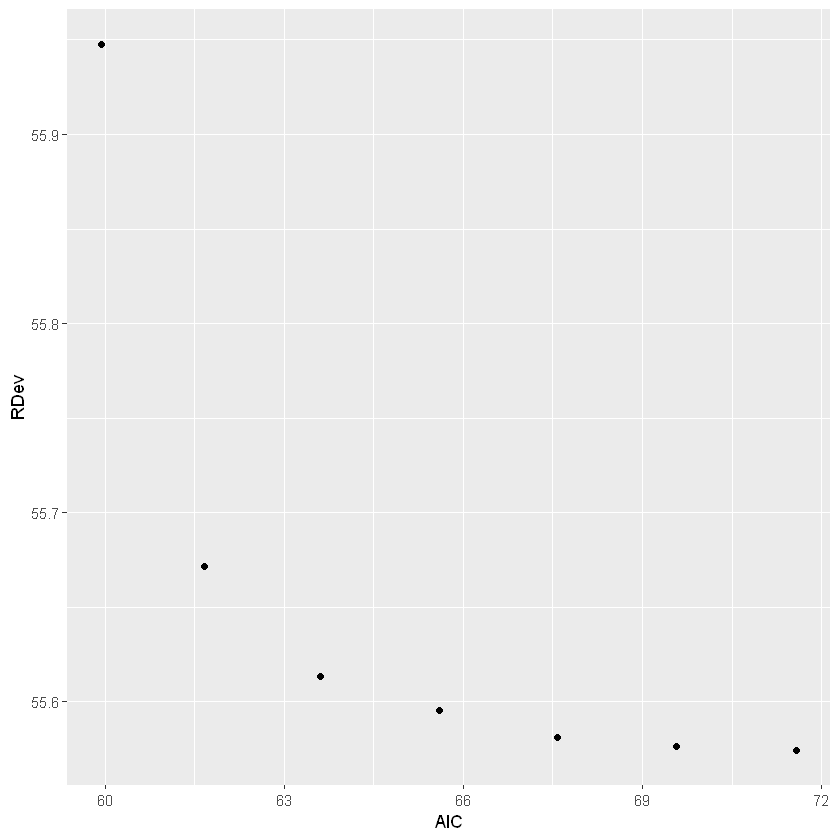

In [269]:
ggplot(bs_recent_champion, aes(x=AIC, y=RDev)) +
    geom_point()

# MLR

Create a model to predict other variables previously as features, seen as important metrics:
- Winning Percentage
- On-Base Percentage
- Slugging Percentage

In [270]:
df_full_test <- df_full %>% select(-c(Year, League))

In [271]:
# regsubsets builds models with forward selection
reg_lm_full <- regsubsets(data=df_full_test, WP ~ .)

In [272]:
rs <- summary(reg_lm_full)
rs$which

,(Intercept),OBP,SLG,BA,RD,Playoffs,Champion
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
3,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
4,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE
5,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [273]:
2*(2:12)

[1]  4  6  8 10 12 14 16 18 20 22 24

In [274]:
# compute dimensions from dataset
n <- dim(df_full_test)[1]
m <- dim(df_full_test)[2]
x <- 1:(m-1)

AIC <- 2*(2:m) + n*log(rs$rss/n)
BIC <- log(n)*(2:m) + n*log(rs$rss/n)
R2Adj <- rs$adjr2

In [275]:
AIC_df <- data.frame(AIC = AIC)
BIC_df <- data.frame(BIC = BIC)
R2Adj_df <- data.frame(R2Adj = R2Adj)

In [276]:
# AIC Plot
AIC_plot <- ggplot(data = AIC_df, aes(x=x, y=AIC)) +
    geom_line() +
    xlab('Model') +
    ggtitle('AIC Curve')

# BIC Plot
BIC_plot <- ggplot(data = BIC_df, aes(x=x, y=BIC)) +
    geom_line() +
    xlab('Model') +
    ggtitle('BIC Curve')

# Adjusted R2 Plot
R2Adj_plot <- ggplot(data = R2Adj_df, aes(x=x, y=R2Adj)) +
    geom_line() +
    xlab('Model') +
    ggtitle('R2Adj Curve')

In [277]:
combined_plot <- ggarrange(AIC_plot, BIC_plot, R2Adj_plot, labels = c('AIC', 'BIC', 'R2Adj'))

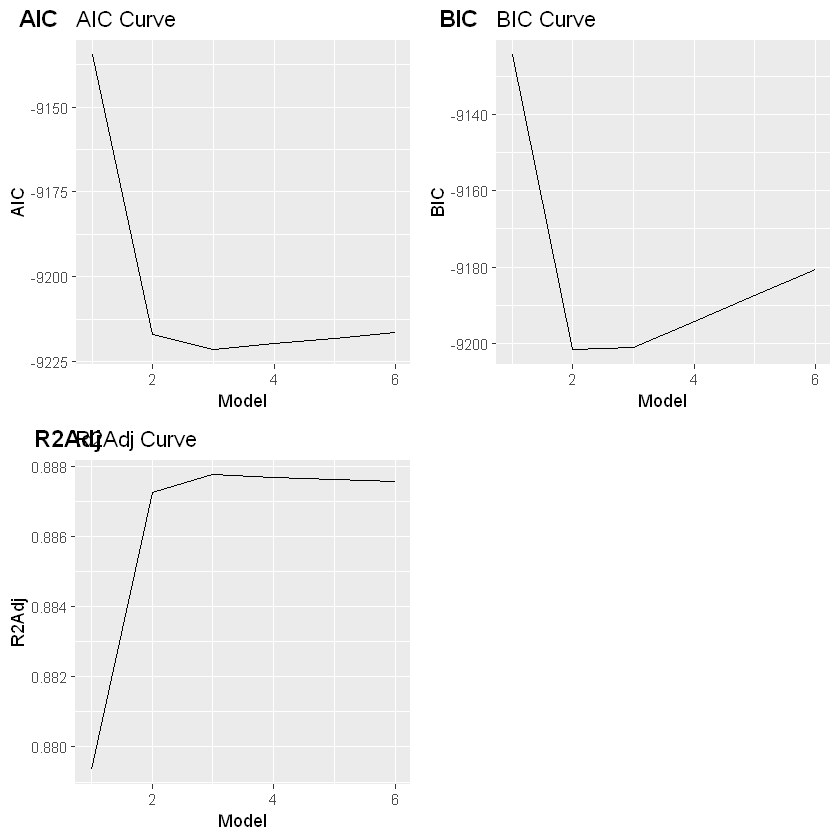

In [278]:
combined_plot

In [279]:
mspe_loop <- function(train_set, test_set, regsubset_summary, response) {
    # observed values from test set
    obs <- test_set[[response]]
    # initialize mspe tracking list
    mspe_results <- c()
    loop_size <- dim(regsubset_summary$which)[1]
    for (model in 1:loop_size) {
        # create model
        true_cols <- names(which(regsubset_summary$which[model,]))
        # remove intercept feature
        true_cols <- true_cols[true_cols != '(Intercept)']
        formula <- paste(unlist(true_cols), collapse = '+')
        formula <- paste('~', formula, '')
        formula <- paste(response, formula, '')
        lmod <- lm(data = train_set, as.formula(formula))
        # calculate MSPE
        preds <- lmod %>% predict(test_set)
        mspe <- mean((obs - preds)^2)
        mspe_results <- c(mspe_results, mspe)
    }
    return(mspe_results)
}

In [280]:
df_full_cleaned <- df_full %>% select(-c(Year, League)) 
#training and test set
set.seed(42)
n = floor(0.8 * nrow(df_full_cleaned)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df_full_cleaned)), size = n) #randomly sample indicies to be included in the training set
# playoffs
train = df_full_cleaned[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = df_full_cleaned[-index, ] #set the testing set to be the remaining rows

In [281]:
# regsubsets builds models with forward selection
reg_lm_full <- regsubsets(data=train, WP ~ .)
rs <- summary(reg_lm_full)
rs$which

,(Intercept),OBP,SLG,BA,RD,Playoffs,Champion
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE
3,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE
4,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE
5,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [282]:
# compute dimensions from dataset
n <- dim(train)[1]
m <- dim(train)[2]
x <- 1:(m-1)

# compute metrics
AIC <- 2*(2:m) + n*log(rs$rss/n)
BIC <- log(n)*(2:m) + n*log(rs$rss/n)
R2Adj <- rs$adjr2
mspe <- mspe_loop(train_set=train, test_set=test, regsubset_summary=rs, response='WP')

# turn metrics into dataframes
AIC_df <- data.frame(AIC = AIC)
BIC_df <- data.frame(BIC = BIC)
R2Adj_df <- data.frame(R2Adj = R2Adj)
mspe_df <- data.frame(MSPE = mspe)

# compute important metric points (in plots)

In [283]:
# AIC Plot
AIC_plot <- ggplot(data = AIC_df, aes(x=x, y=AIC)) +
    geom_line() +
    geom_point(aes(x=which.min(AIC), y=min(AIC)), color='red', size=3) +
    xlab('Model')

# BIC Plot
BIC_plot <- ggplot(data = BIC_df, aes(x=x, y=BIC)) +
    geom_line() +
    geom_point(aes(x=which.min(BIC), y=min(BIC)), color='red', size=3) +
    xlab('Model')

# Adjusted R2 Plot
R2Adj_plot <- ggplot(data = R2Adj_df, aes(x=x, y=R2Adj)) +
    geom_line() +
    geom_point(aes(x=which.max(R2Adj), y=max(R2Adj)), color='red', size=3) +
    xlab('Model')

# MSPE Plot
MSPE_plot <- ggplot(data = mspe_df, aes(x=x, y=MSPE)) +
    geom_line() +
    geom_point(aes(x=which.min(mspe), y=min(mspe)), color='red', size=3) +
    xlab('Model')

In [284]:
combined_plot <- ggarrange(AIC_plot, BIC_plot, R2Adj_plot, MSPE_plot,
                           labels = c('AIC', 'BIC', 'R2Adj', 'MSPE'))

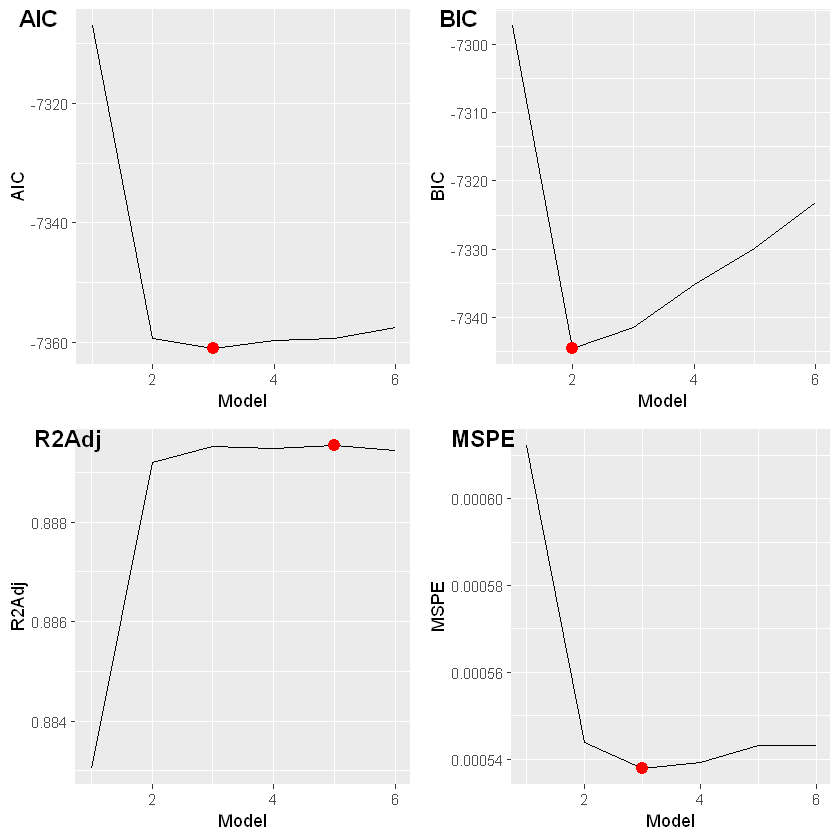

In [285]:
combined_plot

In [286]:
# create function to automate the plotting
plot_models <- function(train_set, test_set, response) {
    # regsubsets builds models with forward selection
    formula <- paste(response, '~.', '')
    reg_lm <- regsubsets(data=train_set, as.formula(formula))
    rs <- summary(reg_lm)
    print(rs$which)
    
    # compute dimensions from dataset
    n <- dim(train_set)[1]
    m <- dim(train_set)[2]
    x <- 1:(m-1)

    # compute metrics
    AIC <- 2*(2:m) + n*log(rs$rss/n)
    BIC <- log(n)*(2:m) + n*log(rs$rss/n)
    R2Adj <- rs$adjr2
    mspe <- mspe_loop(train_set=train_set, test_set=test_set, regsubset_summary=rs, response=response)

    # turn metrics into dataframes
    AIC_df <- data.frame(AIC = AIC)
    BIC_df <- data.frame(BIC = BIC)
    R2Adj_df <- data.frame(R2Adj = R2Adj)
    mspe_df <- data.frame(MSPE = mspe)
    
    # AIC Plot
    AIC_plot <- ggplot(data = AIC_df, aes(x=x, y=AIC)) +
        geom_line() +
        geom_point(aes(x=which.min(AIC), y=min(AIC)), color='red', size=3) +
        xlab('Model')

    # BIC Plot
    BIC_plot <- ggplot(data = BIC_df, aes(x=x, y=BIC)) +
        geom_line() +
        geom_point(aes(x=which.min(BIC), y=min(BIC)), color='red', size=3) +
        xlab('Model')

    # Adjusted R2 Plot
    R2Adj_plot <- ggplot(data = R2Adj_df, aes(x=x, y=R2Adj)) +
        geom_line() +
        geom_point(aes(x=which.max(R2Adj), y=max(R2Adj)), color='red', size=3) +
        xlab('Model')

    # MSPE Plot
    MSPE_plot <- ggplot(data = mspe_df, aes(x=x, y=MSPE)) +
        geom_line() +
        geom_point(aes(x=which.min(mspe), y=min(mspe)), color='red', size=3) +
        xlab('Model')
    
    # combine plots
    combined_plot <- ggarrange(AIC_plot, BIC_plot, R2Adj_plot, MSPE_plot,
                           labels = c('AIC', 'BIC', 'R2Adj', 'MSPE'))
    
    print(combined_plot)
}

  (Intercept)   OBP   SLG    BA   RD Playoffs Champion
1        TRUE FALSE FALSE FALSE TRUE    FALSE    FALSE
2        TRUE FALSE FALSE FALSE TRUE     TRUE    FALSE
3        TRUE FALSE FALSE FALSE TRUE     TRUE     TRUE
4        TRUE FALSE FALSE  TRUE TRUE     TRUE     TRUE
5        TRUE  TRUE FALSE  TRUE TRUE     TRUE     TRUE
6        TRUE  TRUE  TRUE  TRUE TRUE     TRUE     TRUE


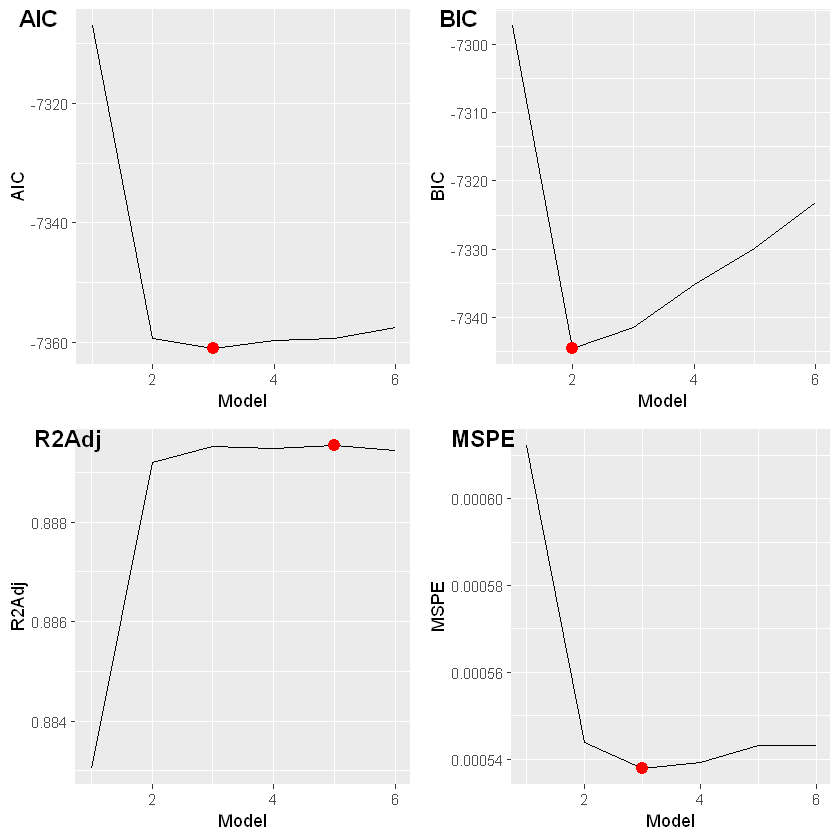

In [287]:
plot_models(train_set=train, test_set=test, response='WP')

In [288]:
# full dataset for modeling
df_full_mlr <- df_full %>% select(-c(Year, League))
head(df_full_mlr)
# recent dataset for modeling
df_recent_mlr <- df_recent %>% select(-c(Year, League))
head(df_recent_mlr)

OBP,SLG,BA,WP,RD,Playoffs,Champion
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.328,0.418,0.259,0.5000000,46,0,0
0.320,0.389,0.247,0.5802469,100,1,0
0.311,0.417,0.247,0.5740741,7,1,0
0.315,0.415,0.260,0.4259259,-72,0,0
0.302,0.378,0.240,0.3765432,-146,0,0
0.318,0.422,0.255,0.5246914,72,0,0


OBP,SLG,BA,WP,RD,OOBP,OSLG,Playoffs,Champion
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.328,0.418,0.259,0.5000000,46,0.317,0.415,0,0
0.320,0.389,0.247,0.5802469,100,0.306,0.378,1,0
0.311,0.417,0.247,0.5740741,7,0.315,0.403,1,0
0.315,0.415,0.260,0.4259259,-72,0.331,0.428,0,0
0.302,0.378,0.240,0.3765432,-146,0.335,0.424,0,0
0.318,0.422,0.255,0.5246914,72,0.319,0.405,0,0


In [289]:
df_full_mlr_wp_long <- pivot_longer(df_full_mlr,
                                 cols = names(df_full_mlr %>% select(-c(WP))),
                                 names_to = 'feature_names',
                                 values_to = 'feature_values')
df_full_mlr_obp_long <- pivot_longer(df_full_mlr,
                                 cols = names(df_full_mlr %>% select(-c(OBP))),
                                 names_to = 'feature_names',
                                 values_to = 'feature_values')
df_full_mlr_slg_long <- pivot_longer(df_full_mlr,
                                 cols = names(df_full_mlr %>% select(-c(SLG))),
                                 names_to = 'feature_names',
                                 values_to = 'feature_values')

In [290]:
head(df_full_mlr_wp_long)

WP,feature_names,feature_values
<dbl>,<chr>,<dbl>
0.5,OBP,0.328
0.5,SLG,0.418
0.5,BA,0.259
0.5,RD,46.000
0.5,Playoffs,0.000
0.5,Champion,0.000


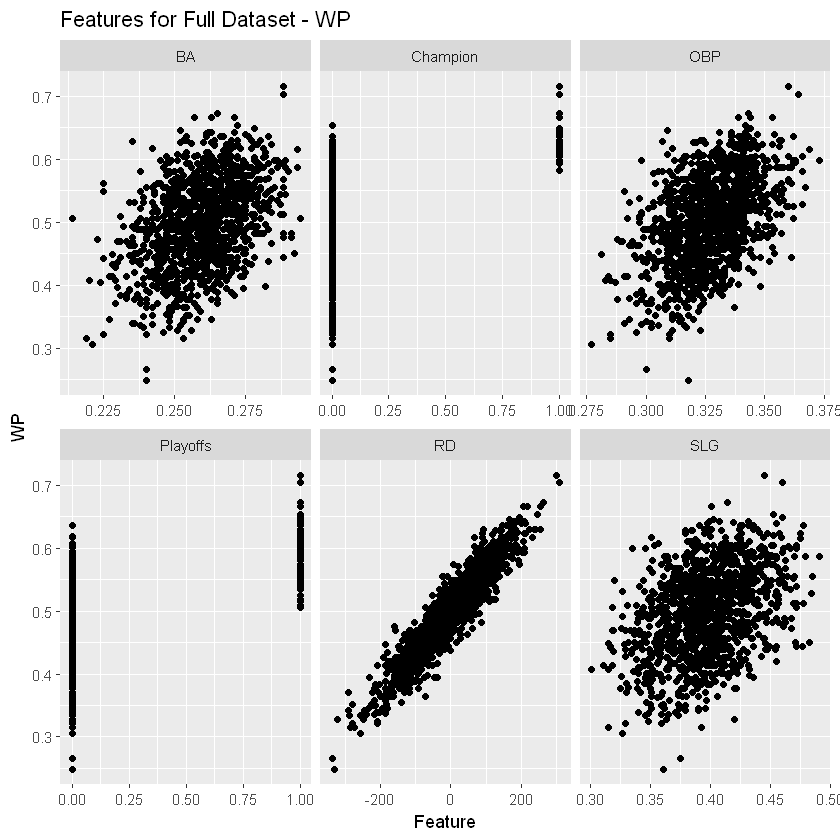

In [291]:
# full dataset WP plots
ggplot(df_full_mlr_wp_long, aes(x=feature_values, y=WP)) +
    geom_point() +
    facet_wrap(~ feature_names, scales = 'free_x') +
    ggtitle('Features for Full Dataset - WP') +
    xlab('Feature')

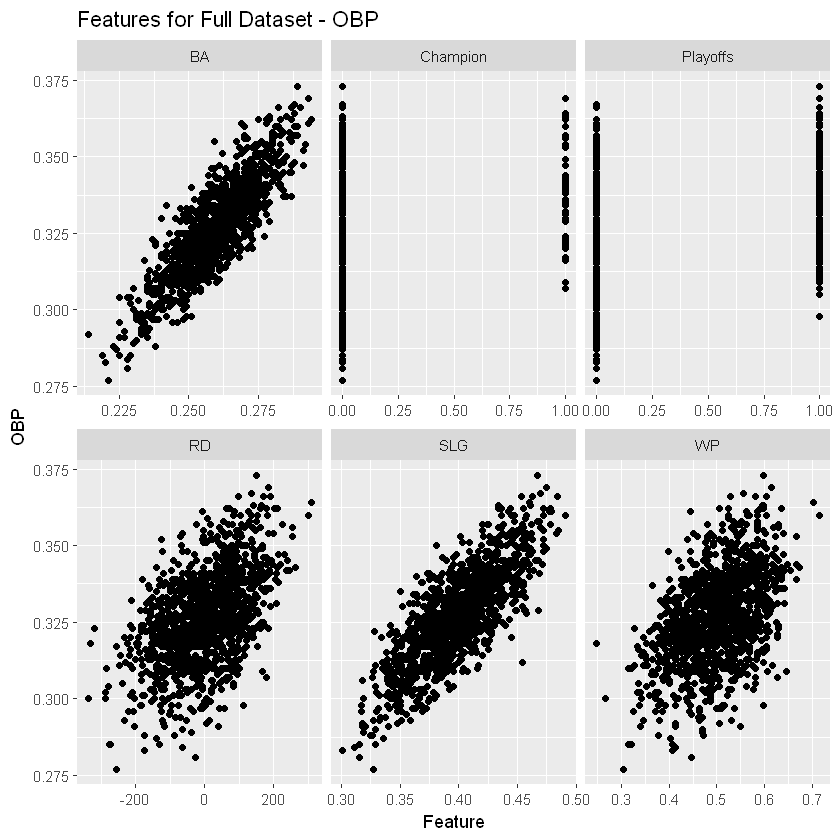

In [292]:
# full dataset OBP plots
ggplot(df_full_mlr_obp_long, aes(x=feature_values, y=OBP)) +
    geom_point() +
    facet_wrap(~ feature_names, scales = 'free_x') +
    ggtitle('Features for Full Dataset - OBP') +
    xlab('Feature')

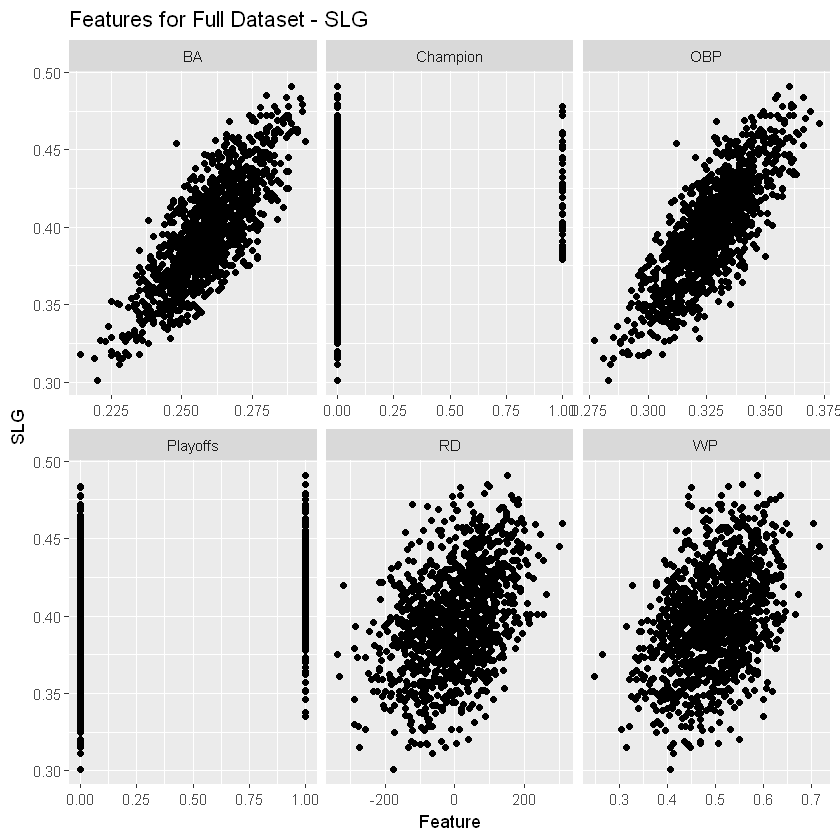

In [293]:
# full dataset SLG plots
ggplot(df_full_mlr_slg_long, aes(x=feature_values, y=SLG)) +
    geom_point() +
    facet_wrap(~ feature_names, scales = 'free_x') +
    ggtitle('Features for Full Dataset - SLG') +
    xlab('Feature')

In [294]:
# create function for faceted plots - we'll need 6 dataframes
# full_dataset -> long version for WP, OBP, SLG
# recent_dataset -> long version for WP, OBP, SLG
# test with df_full_mlr_wp_long, df_full_mlr_obp_long, df_full_mlr_slg_long

# function for making dataframe long with respect to response variable
create_long_df <- function(df, response) {
    df_long <- pivot_longer(df,
                            cols = names(df %>% select(-all_of(response))),
                            names_to = 'feature_names',
                            values_to = 'feature_values')
    return(df_long)
}



In [295]:
long_df <- create_long_df(df_full_mlr, 'WP')
head(long_df)
dim(long_df)

WP,feature_names,feature_values
<dbl>,<chr>,<dbl>
0.5,OBP,0.328
0.5,SLG,0.418
0.5,BA,0.259
0.5,RD,46.000
0.5,Playoffs,0.000
0.5,Champion,0.000


[1] 7392    3

In [296]:
plot_long_facets <- function(df_long, subset_type, response) {
    title_text <- paste(subset_type, response)
    ggplot(df_long, aes(x=feature_values, y=!!sym(response))) +
        geom_point() +
        facet_wrap(~ feature_names, scales = 'free_x') +
        ggtitle(title_text) +
        xlab('Feature')
}

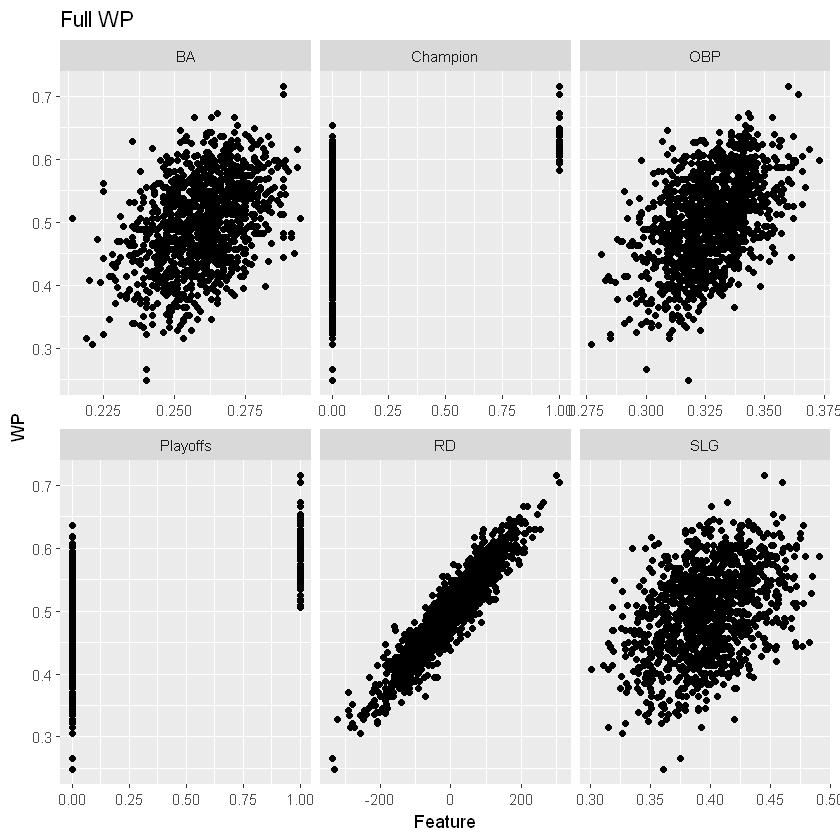

In [297]:
plot_long_facets(df_full_mlr_wp_long, 'Full', 'WP')

# Pythagorean Theorem of Baseball

In [298]:
head(df)

Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NA,NA,162,0.317,0.415
ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4,5,162,0.306,0.378
BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5,4,162,0.315,0.403
BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NA,NA,162,0.331,0.428
CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NA,NA,162,0.335,0.424
CHW,AL,2012,748,676,85,0.318,0.422,0.255,0,NA,NA,162,0.319,0.405


In [299]:
df_theorem <- df %>% select(c(RS, RA, W, G))
df_theorem$WP <- with(df_theorem, W/G)
df_theorem <- df_theorem %>% select(-c(W, G))
head(df_theorem)

RS,RA,WP
<dbl>,<dbl>,<dbl>
734,688,0.5000000
700,600,0.5802469
712,705,0.5740741
734,806,0.4259259
613,759,0.3765432
748,676,0.5246914


In [300]:
lmod <- lm(data = df_theorem, WP ~ .)

In [301]:
summary(lmod)


Call:
lm(formula = WP ~ ., data = df_theorem)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.089070 -0.016726  0.000271  0.016933  0.078831 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.007e-01  6.560e-03   76.33   <2e-16 ***
RS           6.434e-04  8.260e-06   77.90   <2e-16 ***
RA          -6.449e-04  8.123e-06  -79.40   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.02454 on 1229 degrees of freedom
Multiple R-squared:  0.8794,	Adjusted R-squared:  0.8792 
F-statistic:  4483 on 2 and 1229 DF,  p-value: < 2.2e-16


Let

$R_s$: Runs Scored

$R_a$: Runs Allowed

$W_p$: Winning Percentage

Then, there were two formulas presented:

The more *common*:

$W_p = \frac{R_s^2}{R_s^2 + R_a^2}$

The more *accurate*:

$W_p = \frac{R_s^{1.81}}{R_s^{1.81} + R_a^{1.81}}$

Our goal is to find some factor, f, such that:

$$W_p = \frac{R_s^f}{R_s^f + R_a^f}$$

For ease, let's assign 

- $R_s = s$
- $R_a = a$
- $W_p = p$

$W_p = \frac{R_s^f}{R_s^f + R_a^f}$

$\rightarrow p = \frac{s^f}{s^f + a^f}$

$(s^f + a^f) p = \frac{s^f}{s^f + a^f} (s^f + a^f)$

$(s^f + a^f)p = s^f$

$s^fp + a^fp = s^f$

$a^fp = s^f - s^fp$

$a^fp = s^f(1 - p)$

$\frac{p}{1 - p} = \frac{s^f}{a^f}$

$\log(\frac{p}{1 - p}) = \log(\frac{s^f}{a^f})$

$\log(\frac{p}{1 - p}) = f\log(\frac{s}{a})$

So what this means for our dataset is that we can transform our columns into:

- $y = \log(\frac{W_p}{1-W_p})$: response variable
- $x = \log(\frac{R_s}{R_a})$: predictor variable

By using simple linear regression, we can create a model where

$y = \beta_0 + \beta_1 x$,

If the **Pythagorean Formula of Baseball** holds weight, then we would roughly expect

$\beta_0$ to be close to 0 and $\beta_1$ near the range $(1.81, 2)$, from:

The more *common*:

$W_p = \frac{R_s^2}{R_s^2 + R_a^2}$

The more *accurate*:

$W_p = \frac{R_s^{1.81}}{R_s^{1.81} + R_a^{1.81}}$

In [302]:
df_theorem$log_wp <- with(df_theorem, log(WP/(1-WP)))
df_theorem$log_ra <- with(df_theorem, log(RA))
df_theorem$log_rs <- with(df_theorem, log(RS))

In [303]:
lmod <- lm(data=df_theorem, log_wp ~ log_rs + log_ra)
summary(lmod)


Call:
lm(formula = log_wp ~ log_rs + log_ra, data = df_theorem)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36460 -0.06833  0.00050  0.06725  0.31287 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.06695    0.17242   0.388    0.698    
log_rs       1.86561    0.02368  78.774   <2e-16 ***
log_ra      -1.87615    0.02349 -79.860   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09929 on 1229 degrees of freedom
Multiple R-squared:  0.8812,	Adjusted R-squared:  0.881 
F-statistic:  4559 on 2 and 1229 DF,  p-value: < 2.2e-16


In [304]:
# test on only recent data
df_theorem_recent <- df[df$Year > season_break, ]
df_theorem_recent <- df_theorem_recent %>% select(c(RS, RA, W, G))
df_theorem_recent$WP <- with(df_theorem_recent, W/G)
df_theorem_recent <- df_theorem_recent %>% select(-c(W, G))
df_theorem_recent$log_wp <- with(df_theorem_recent, log(WP/(1-WP)))
df_theorem_recent$log_ra <- with(df_theorem_recent, log(RA))
df_theorem_recent$log_rs <- with(df_theorem_recent, log(RS))

In [305]:
lmod <- lm(data=df_theorem_recent, log_wp ~ log_rs + log_ra)
summary(lmod)


Call:
lm(formula = log_wp ~ log_rs + log_ra, data = df_theorem_recent)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.269843 -0.072010 -0.004106  0.060333  0.314853 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.46737    0.36862   1.268    0.206    
log_rs       1.87694    0.04492  41.781   <2e-16 ***
log_ra      -1.94776    0.04286 -45.449   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09967 on 417 degrees of freedom
Multiple R-squared:  0.8842,	Adjusted R-squared:  0.8837 
F-statistic:  1593 on 2 and 417 DF,  p-value: < 2.2e-16


Or even SLR with the term $\frac{R_s}{R_a}$, which should give us a single $\beta_1$.

In [306]:
df_theorem$log_combined <- with(df_theorem, log(RS/RA))

In [307]:
lmod <- lm(data=df_theorem, log_wp ~ log_combined)
summary(lmod)


Call:
lm(formula = log_wp ~ log_combined, data = df_theorem)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36456 -0.06840  0.00013  0.06704  0.31094 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.002198   0.002828  -0.777    0.437    
log_combined  1.870947   0.019587  95.519   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09926 on 1230 degrees of freedom
Multiple R-squared:  0.8812,	Adjusted R-squared:  0.8811 
F-statistic:  9124 on 1 and 1230 DF,  p-value: < 2.2e-16


In [308]:
confint(lmod, 'log_combined', level=0.95)

,2.5 %,97.5 %
log_combined,1.832519,1.909375


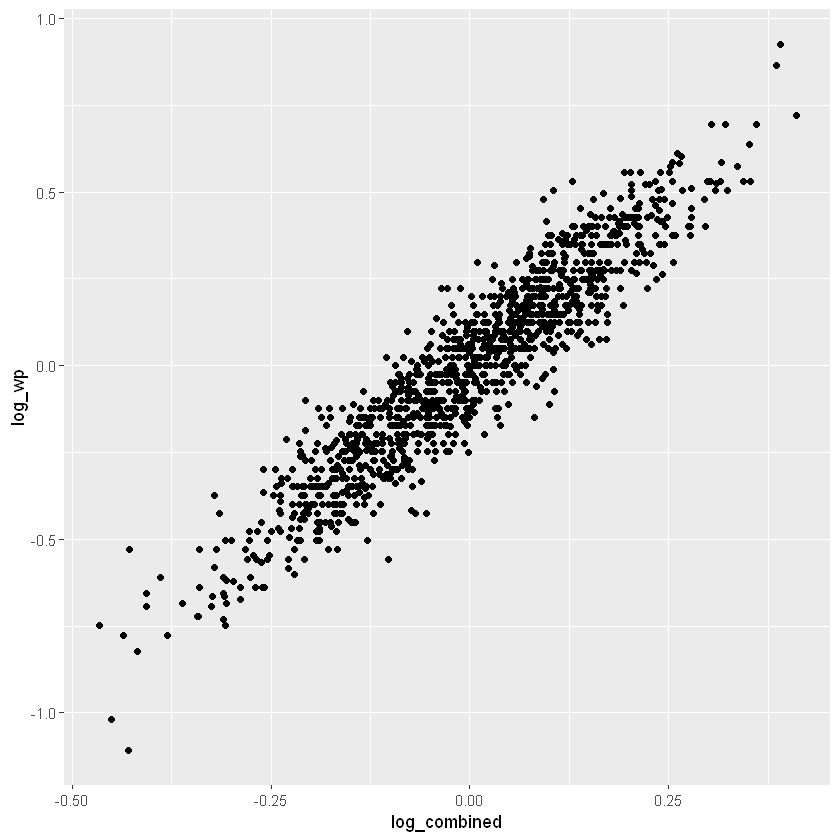

In [309]:
ggplot(data=df_theorem, aes(x=log_combined, y=log_wp)) +
    geom_point()

In [310]:
derived_factor <- unname(lmod$coefficients[2])
dim(df_theorem)

[1] 1232    7

In [311]:
# let's plot lines for common definition, the *more accurate* definition, and the definition from our model
df_theorem$common <- with(df_theorem, RS^2 / (RS^2 + RA^2))
df_theorem$accurate <- with(df_theorem, RS^1.81 / (RS^1.81 + RA^1.81))
df_theorem$derived <- with(df_theorem, RS^derived_factor / (RS^derived_factor + RA^derived_factor))

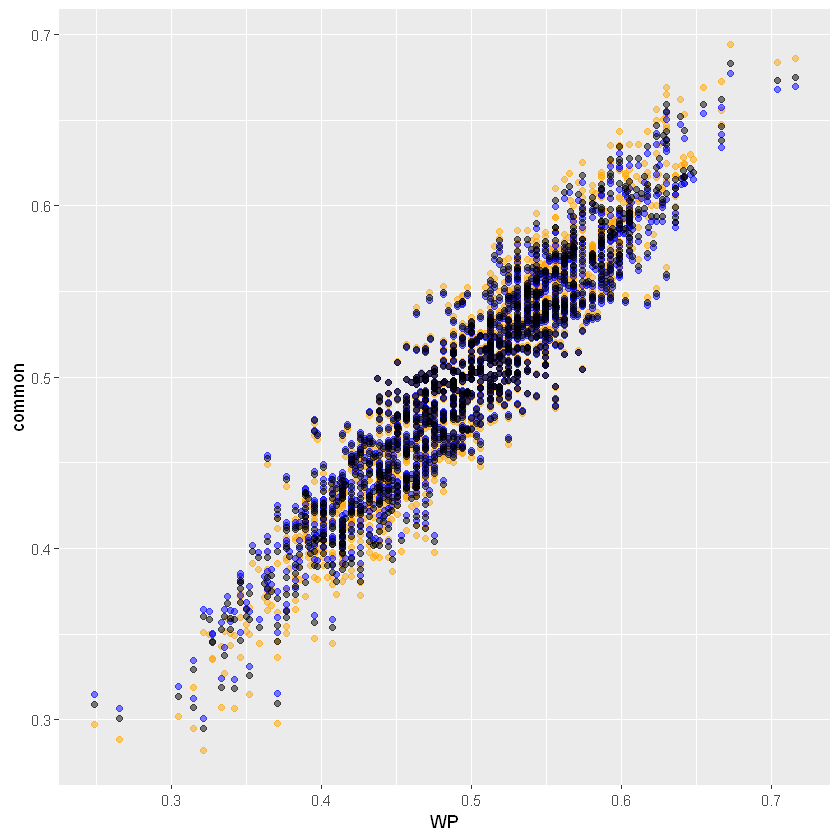

In [312]:
ggplot(df_theorem) +
    geom_point(aes(WP, y=common), color='orange', alpha=0.5) +
    geom_point(aes(WP, y=accurate), color='blue', alpha=0.5) +
    geom_point(aes(WP, y=derived), alpha=0.5)

# GLM Diagnostics

In [313]:
# model results
bs_full_playoffs <- backwards_glm(df_full_playoffs, 'Playoffs')
bs_full_champion <- backwards_glm(df_full_champion, 'Champion')
bs_recent_playoffs <- backwards_glm(df_recent_playoffs, 'Playoffs')
bs_recent_champion <- backwards_glm(df_recent_champion, 'Champion')

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [316]:
head(df_full_playoffs)
bs_full_playoffs

OBP,SLG,BA,WP,RD,Playoffs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.328,0.418,0.259,0.5000000,46,0
0.320,0.389,0.247,0.5802469,100,1
0.311,0.417,0.247,0.5740741,7,1
0.315,0.415,0.260,0.4259259,-72,0
0.302,0.378,0.240,0.3765432,-146,0
0.318,0.422,0.255,0.5246914,72,0


X.Intercept.,OBP,SLG,BA,WP,RD,AIC,RDev,Ftest
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.383497e-18,0.03394631,0.0293630594,0.1630210,1.700432e-22,0.6613219,499.5289,487.5289,NA
4.571721e-27,0.03693743,0.0321783524,0.1623381,5.033030e-42,NA,497.7207,487.7207,6.613634e-01
3.170852e-29,0.11545353,0.0737873214,NA,2.979730e-42,NA,497.6812,489.6812,3.408981e-01
8.148168e-42,NA,0.0000165078,NA,4.632747e-43,NA,498.1871,492.1871,1.986039e-01
1.857707e-47,NA,NA,NA,3.360641e-46,NA,515.5951,511.5951,7.746982e-05


In [318]:
glmod <- glm(data=df_full_playoffs, Playoffs ~ ., family=binomial)

In [319]:
summary(glmod)


Call:
glm(formula = Playoffs ~ ., family = binomial, data = df_full_playoffs)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -44.54323    5.06245  -8.799   <2e-16 ***
OBP          33.00367   15.56256   2.121   0.0339 *  
SLG          13.18186    6.05067   2.179   0.0294 *  
BA          -24.16700   17.32422  -1.395   0.1630    
WP           61.13716    6.26517   9.758   <2e-16 ***
RD           -0.00156    0.00356  -0.438   0.6613    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1226.31  on 1231  degrees of freedom
Residual deviance:  487.53  on 1226  degrees of freedom
AIC: 499.53

Number of Fisher Scoring iterations: 7


In [322]:
# train/test split for recent data
set.seed(42)
n = floor(0.8 * nrow(df_full_playoffs)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df_full_playoffs)), size = n) #randomly sample indicies to be included in the training set
# playoffs
train = df_full_playoffs[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = df_full_playoffs[-index, ] #set the testing set to be the remaining rows

In [323]:
glmod <- glm(data=train, Playoffs ~ ., family=binomial)

In [326]:
pred <- predict(glmod, test, 'response')

In [329]:
summary(pred)
head(pred)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000009 0.0008999 0.0230957 0.2069265 0.2908850 0.9881804 

1            2            3            4            5            6 
2.984150e-04 1.005142e-05 8.465503e-01 8.659532e-05 6.563566e-04 1.907660e-04

In [336]:
obs <- test$Playoffs
pred_probs <- predict(glmod, test, 'response')
pred <- ifelse(pred_probs>0.5,1,0)

In [345]:
mspe <- mean((obs - pred)^2)
mspe

[1] 0.07692308

In [343]:
model_mspe <- function(test_data, response_var, glmod, threshold=0.5) {
    # gather observations respective to response variable
    obs <- test_data[[response_var]]
    # get probabilities given input
    pred_probs <- predict(glmod, test_data, 'response')
    # turn probabilities into values given the threshold (default=0.5)
    pred <- ifelse(pred_probs > 0.5, 1, 0)
    # calculate mean squared prediction error (mspe)
    mspe <- mean((obs - pred)^2)
    return(mspe)
}

In [344]:
model_mspe(test_data=test, response_var='Playoffs', glmod=glmod)

[1] 0.07692308